(10, 1152)


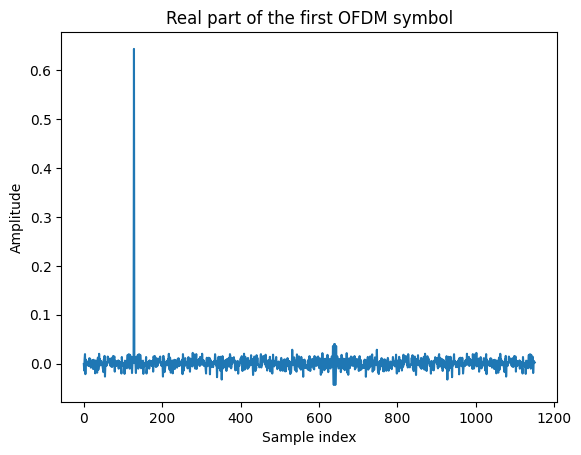

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# OFDM parameters
num_subcarriers = 1024
num_pilots = 256
fft_size = 1024  # Assuming FFT size is equal to the number of subcarriers
cyclic_prefix_size = 128
pilot_value = 1  # We can choose any fixed value for pilot symbols

# Generate random data bits
data_bits = np.random.randint(0, 2, num_subcarriers - num_pilots)

# Initialize OFDM symbol array for 10 symbols
num_symbols = 10
ofdm_symbols = np.zeros((num_symbols, num_subcarriers + cyclic_prefix_size), dtype=complex)

# Create a function to generate one OFDM symbol
def generate_ofdm_symbol(data_bits, num_subcarriers, num_pilots, fft_size, cyclic_prefix_size, pilot_value):
    # Initialize OFDM symbol in the frequency domain
    ofdm_symbol_freq = np.zeros(num_subcarriers, dtype=complex)

    # Insert pilot symbols at regular intervals
    pilot_indices = np.linspace(0, num_subcarriers - 1, num_pilots, dtype=int)
    data_indices = np.setdiff1d(np.arange(num_subcarriers), pilot_indices)

    ofdm_symbol_freq[pilot_indices] = pilot_value
    ofdm_symbol_freq[data_indices] = data_bits

    # Perform IFFT to convert to time domain
    ofdm_symbol_time = np.fft.ifft(ofdm_symbol_freq, fft_size)

    # Add cyclic prefix
    cyclic_prefix = ofdm_symbol_time[-cyclic_prefix_size:]
    ofdm_symbol_with_cp = np.concatenate([cyclic_prefix, ofdm_symbol_time])

    return ofdm_symbol_with_cp

# Generate 10 OFDM symbols
for i in range(num_symbols):
    ofdm_symbols[i] = generate_ofdm_symbol(data_bits, num_subcarriers, num_pilots, fft_size, cyclic_prefix_size, pilot_value)

# Print the shape of the generated OFDM symbols array
print(ofdm_symbols.shape)

# Optional: Plot the real part of the first OFDM symbol
plt.plot(ofdm_symbols[0].real)
plt.title('Real part of the first OFDM symbol')
plt.xlabel('Sample index')
plt.ylabel('Amplitude')
plt.show()


(10, 1152)


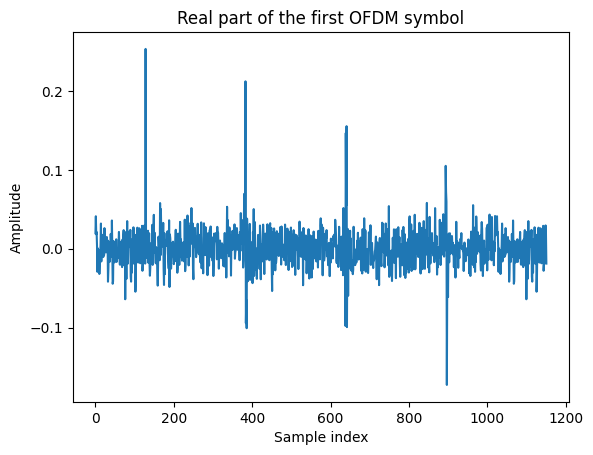

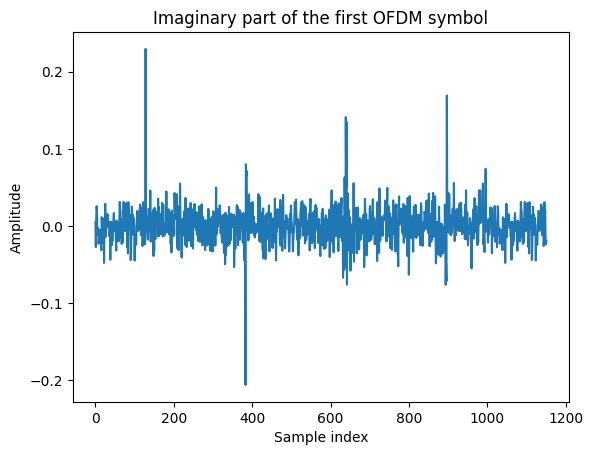

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# OFDM parameters
num_subcarriers = 1024
num_pilots = 256
fft_size = 1024  # Assuming FFT size is equal to the number of subcarriers
cyclic_prefix_size = 128
pilot_value = 1 + 1j  # Use a complex value for pilot symbols

# Generate random data bits (4 bits per QAM symbol)
data_bits = np.random.randint(0, 2, (num_subcarriers - num_pilots) * 4)

# Function to map binary bits to 16-QAM symbols
def bits_to_qam16(bits):
    # Reshape bits into groups of 4
    bits = bits.reshape((-1, 4))

    # Map each group of 4 bits to a corresponding 16-QAM symbol
    # Mapping: 0000 -> (-3, -3), 0001 -> (-3, -1), 0010 -> (-3, +3), 0011 -> (-3, +1)
    # Mapping continues similarly for all 16 combinations
    qam_symbols = 1/np.sqrt(10) * ((2*bits[:,0] + bits[:,1]) * 2 - 3 + 1j*((2*bits[:,2] + bits[:,3]) * 2 - 3))

    return qam_symbols

# Map data bits to 16-QAM symbols
qam_symbols = bits_to_qam16(data_bits)

# Initialize OFDM symbol array for 10 symbols
num_symbols = 10
ofdm_symbols = np.zeros((num_symbols, num_subcarriers + cyclic_prefix_size), dtype=complex)

# Create a function to generate one OFDM symbol
def generate_ofdm_symbol(qam_symbols, num_subcarriers, num_pilots, fft_size, cyclic_prefix_size, pilot_value):
    # Initialize OFDM symbol in the frequency domain
    ofdm_symbol_freq = np.zeros(num_subcarriers, dtype=complex)

    # Insert pilot symbols at regular intervals
    pilot_indices = np.linspace(0, num_subcarriers - 1, num_pilots, dtype=int)
    data_indices = np.setdiff1d(np.arange(num_subcarriers), pilot_indices)

    ofdm_symbol_freq[pilot_indices] = pilot_value
    ofdm_symbol_freq[data_indices] = qam_symbols

    # Perform IFFT to convert to time domain
    ofdm_symbol_time = np.fft.ifft(ofdm_symbol_freq, fft_size)

    # Add cyclic prefix
    cyclic_prefix = ofdm_symbol_time[-cyclic_prefix_size:]
    ofdm_symbol_with_cp = np.concatenate([cyclic_prefix, ofdm_symbol_time])

    return ofdm_symbol_with_cp

# Generate 10 OFDM symbols
for i in range(num_symbols):
    ofdm_symbols[i] = generate_ofdm_symbol(qam_symbols, num_subcarriers, num_pilots, fft_size, cyclic_prefix_size, pilot_value)

# Print the shape of the generated OFDM symbols array
print(ofdm_symbols.shape)

# Optional: Plot the real part of the first OFDM symbol
plt.plot(ofdm_symbols[0].real)
plt.title('Real part of the first OFDM symbol')
plt.xlabel('Sample index')
plt.ylabel('Amplitude')
plt.show()

# Optional: Plot the imaginary part of the first OFDM symbol
plt.plot(ofdm_symbols[0].imag)
plt.title('Imaginary part of the first OFDM symbol')
plt.xlabel('Sample index')
plt.ylabel('Amplitude')
plt.show()


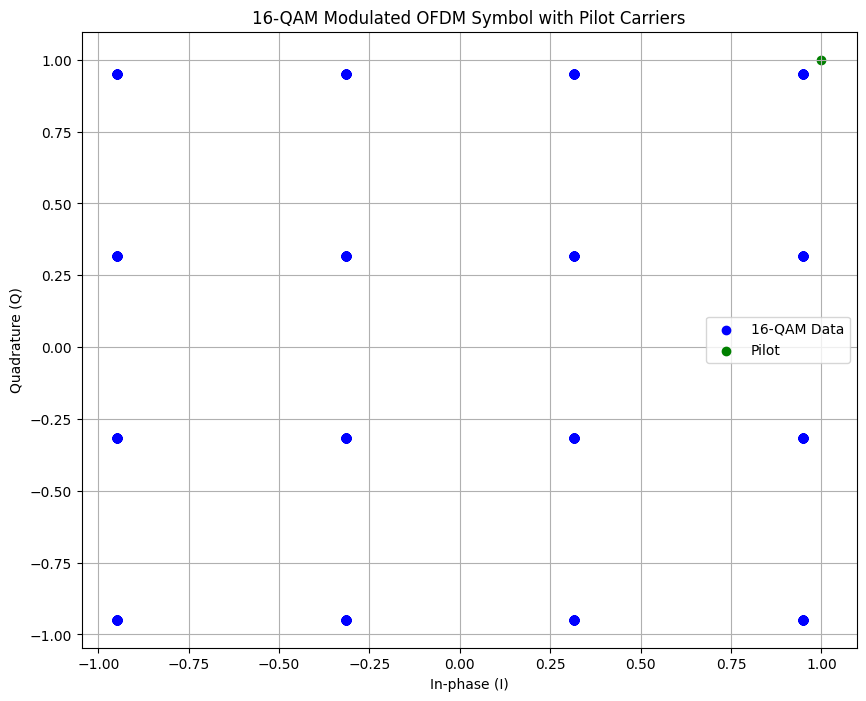

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(qam_symbols.real, qam_symbols.imag, c='b')
plt.scatter(pilot_value.real, pilot_value.imag, c='g')
plt.title('16-QAM Modulated OFDM Symbol with Pilot Carriers')
plt.xlabel('In-phase (I)')
plt.ylabel('Quadrature (Q)')
plt.grid(True)
plt.legend(['16-QAM Data', 'Pilot'])
plt.show()

[ 0.00097656+0.00097656j  0.00097656+0.00097656j -0.00092645+0.00030882j
 ...  0.00030882-0.00030882j -0.00030882+0.00030882j
  0.00030882-0.00030882j]


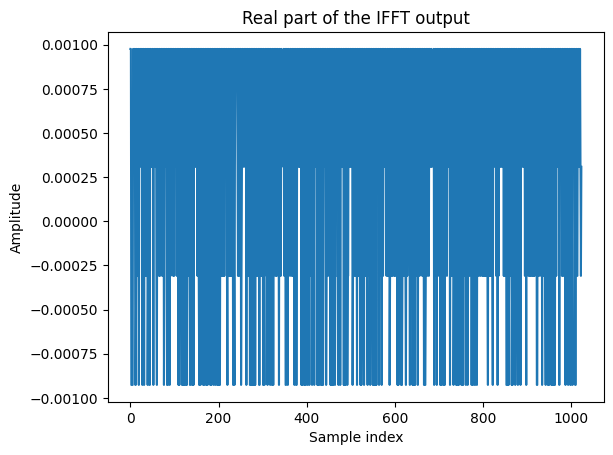

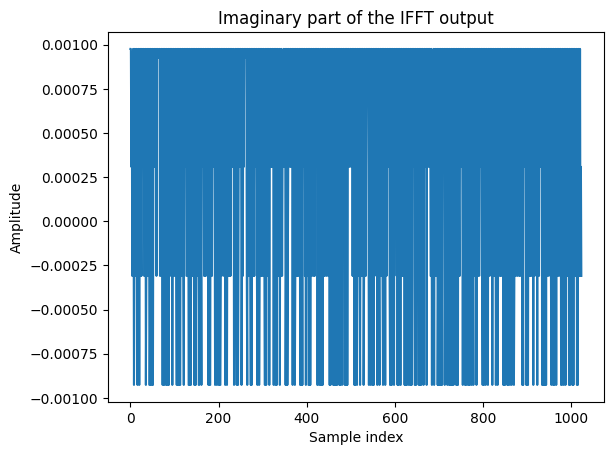

In [ ]:
import numpy as np

# Assuming qam_symbols and other parameters are already defined

# Function to generate one OFDM symbol (excluding cyclic prefix addition)
def generate_ofdm_symbol_no_cp(qam_symbols, num_subcarriers, num_pilots, fft_size, pilot_value):
    # Initialize OFDM symbol in the frequency domain
    ofdm_symbol_freq = np.zeros(num_subcarriers, dtype=complex)

    # Insert pilot symbols at regular intervals
    pilot_indices = np.linspace(0, num_subcarriers - 1, num_pilots, dtype=int)
    data_indices = np.setdiff1d(np.arange(num_subcarriers), pilot_indices)

    ofdm_symbol_freq[pilot_indices] = pilot_value
    ofdm_symbol_freq[data_indices] = qam_symbols

    # Perform IFFT to convert to time domain
    ofdm_symbol_time = np.fft.ifft(ofdm_symbol_freq, fft_size)

    return ofdm_symbol_time

# Generate one OFDM symbol without cyclic prefix
ofdm_symbol_no_cp = generate_ofdm_symbol_no_cp(qam_symbols, num_subcarriers, num_pilots, fft_size, pilot_value)

# Perform IFFT
ifft_output = np.fft.ifft(ofdm_symbol_no_cp, fft_size)

# Print the IFFT output
print(ifft_output)

# Optional: Plot the real part of the IFFT output
import matplotlib.pyplot as plt
plt.plot(ifft_output.real)
plt.title('Real part of the IFFT output')
plt.xlabel('Sample index')
plt.ylabel('Amplitude')
plt.show()

# Optional: Plot the imaginary part of the IFFT output
plt.plot(ifft_output.imag)
plt.title('Imaginary part of the IFFT output')
plt.xlabel('Sample index')
plt.ylabel('Amplitude')
plt.show()


PAPR: 107.70932860130729 (linear scale)
PAPR: 20.32253318754104 dB


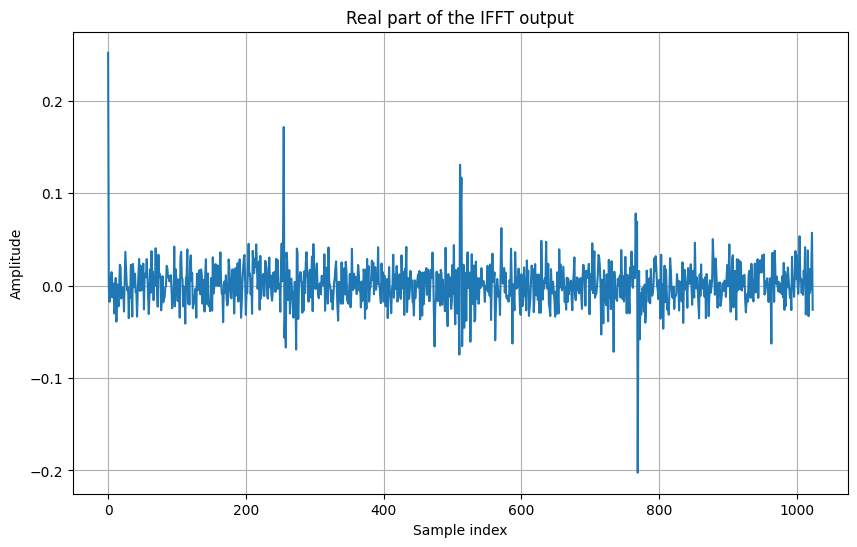

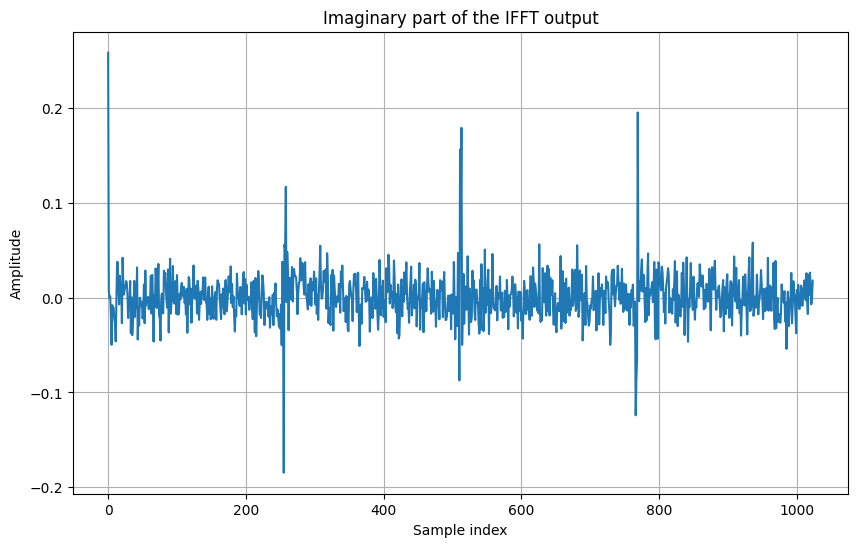

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate one OFDM symbol (excluding cyclic prefix addition)
def generate_ofdm_symbol_no_cp(qam_symbols, num_subcarriers, num_pilots, fft_size, pilot_value):
    # Initialize OFDM symbol in the frequency domain
    ofdm_symbol_freq = np.zeros(num_subcarriers, dtype=complex)

    # Insert pilot symbols at regular intervals
    pilot_indices = np.linspace(0, num_subcarriers - 1, num_pilots, dtype=int)
    data_indices = np.setdiff1d(np.arange(num_subcarriers), pilot_indices)

    ofdm_symbol_freq[pilot_indices] = pilot_value
    ofdm_symbol_freq[data_indices] = qam_symbols

    # Perform IFFT to convert to time domain
    ofdm_symbol_time = np.fft.ifft(ofdm_symbol_freq, fft_size)

    return ofdm_symbol_time

# Example parameters
num_subcarriers = 1024
num_pilots = 256
fft_size = 1024
pilot_value = 1 + 1j

# Generate random QAM symbols for data subcarriers
qam_symbols = (np.random.randn(num_subcarriers - num_pilots) + 1j * np.random.randn(num_subcarriers - num_pilots)) / np.sqrt(2)

# Generate one OFDM symbol without cyclic prefix
ofdm_symbol_no_cp = generate_ofdm_symbol_no_cp(qam_symbols, num_subcarriers, num_pilots, fft_size, pilot_value)

# Calculate power of each sample in the time-domain signal
power_samples = np.abs(ofdm_symbol_no_cp) ** 2

# Calculate peak power and average power
peak_power = np.max(power_samples)
average_power = np.mean(power_samples)

# Calculate PAPR
papr = peak_power / average_power
papr_db = 10 * np.log10(papr)

print(f"PAPR: {papr} (linear scale)")
print(f"PAPR: {papr_db} dB")

# Optional: Plot the real part of the IFFT output
plt.figure(figsize=(10, 6))
plt.plot(ofdm_symbol_no_cp.real)
plt.title('Real part of the IFFT output')
plt.xlabel('Sample index')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Optional: Plot the imaginary part of the IFFT output
plt.figure(figsize=(10, 6))
plt.plot(ofdm_symbol_no_cp.imag)
plt.title('Imaginary part of the IFFT output')
plt.xlabel('Sample index')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


In [ ]:
time_domain_signal = ofdm_symbol_no_cp

In [ ]:
def calculate_papr_dB(signal):
    """Calculate and return the PAPR of the given signal in dB."""
    peak_power = np.max(np.abs(signal)**2)
    average_power = np.mean(np.abs(signal)**2)
    papr = peak_power / average_power
    return 10 * np.log10(papr)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, RepeatVector, TimeDistributed
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from scipy.fftpack import fft, ifft

# Assuming time_domain_signal is your input OFDM signal
X_train = time_domain_signal.real.reshape(-1, 1)  # Prepare the dataset

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)

# Reshape data for LSTM [samples, time steps, features]
X_train_scaled = X_train_scaled.reshape((1, X_train_scaled.shape[0], 1))

# Define and train the LSTM Autoencoder
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2]), return_sequences=True),
    LSTM(20, activation='relu', return_sequences=False),
    RepeatVector(X_train_scaled.shape[1]),
    LSTM(20, activation='relu', return_sequences=True),
    LSTM(50, activation='relu', return_sequences=True),
    TimeDistributed(Dense(1))
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_scaled, X_train_scaled, epochs=10, batch_size=1, verbose=1)

# Predict and apply modifications
predicted_modifications = model.predict(X_train_scaled)
predicted_modifications_rescaled = scaler.inverse_transform(predicted_modifications.reshape(-1, 1))
modified_signal = time_domain_signal.real + predicted_modifications_rescaled.flatten()

# Calculate PAPR in dB for both original and modified signals
original_papr_dB = calculate_papr_dB(time_domain_signal)
modified_papr_dB = calculate_papr_dB(modified_signal)

# Print PAPR values
print(f"Original Time Domain Signal PAPR: {original_papr_dB:.2f} dB")
print(f"Modified Time Domain Signal PAPR after LSTM-AE: {modified_papr_dB:.2f} dB")


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 35s 35s/step - loss: 0.2037
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step - loss: 0.1990
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step - loss: 0.1943
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step - loss: 0.1890
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step - loss: 0.1828
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step - loss: 0.1760
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step - loss: 0.1685
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step - loss: 0.1603
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step - loss: 0.1514
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.1416   
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Original Time Domain Signal PAPR: 20.32 dB
Modified Time Domain Signal PAPR after LSTM-AE: 7.00 dB


In [ ]:
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 1024, 50)       │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 20)             │         5,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_1 (RepeatVector)  │ (None, 1024, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 1024, 20)       │         3,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 1024, 50)       │        14,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 1024, 1)        │            51 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100,835 (393.89 KB)

 Trainable params: 33,611 (131.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 67,224 (262.60 KB)

Text(0, 0.5, 'Amplitude')

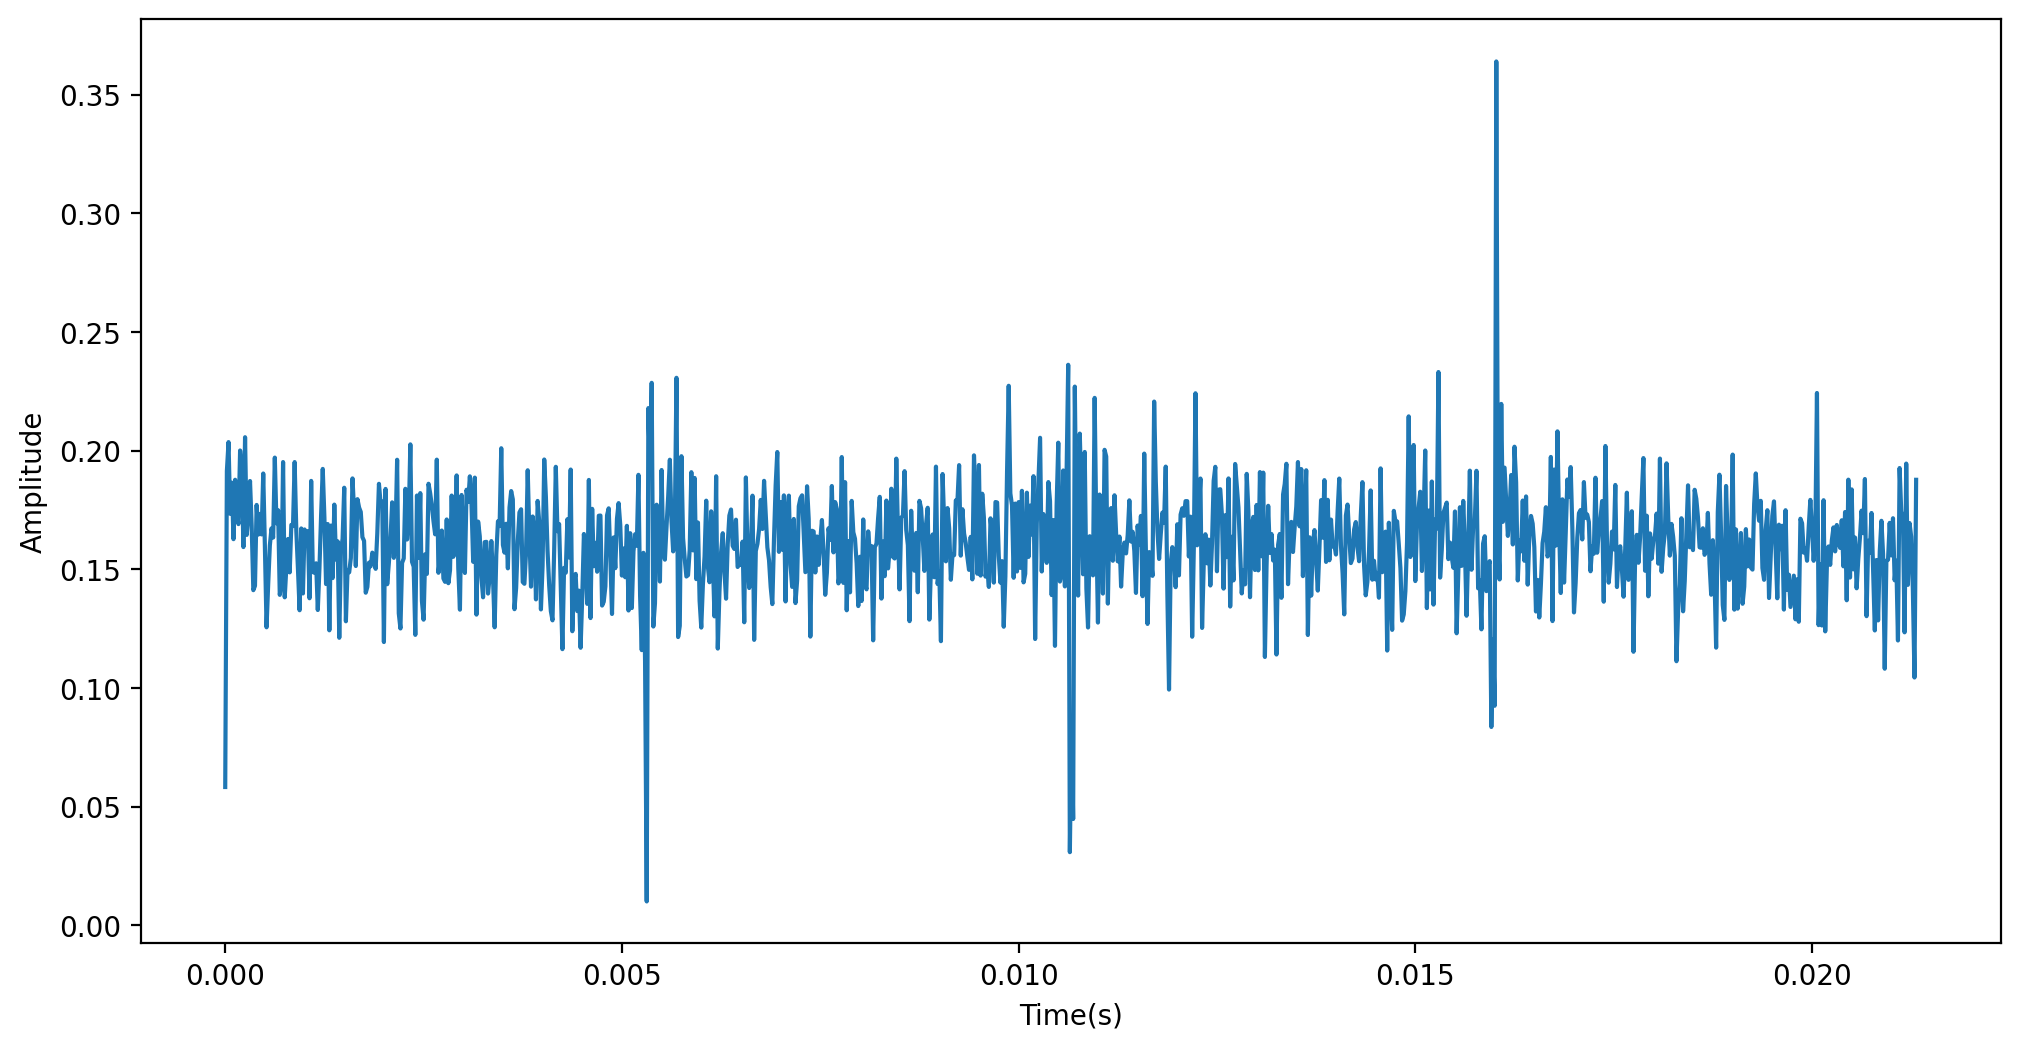

In [ ]:
sampling_rate=48000
time_vector_cp = np.arange(len(modified_signal)) / sampling_rate
plt.figure(figsize=(12, 6),dpi=200)
plt.plot(time_vector_cp,np.abs(modified_signal))
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')

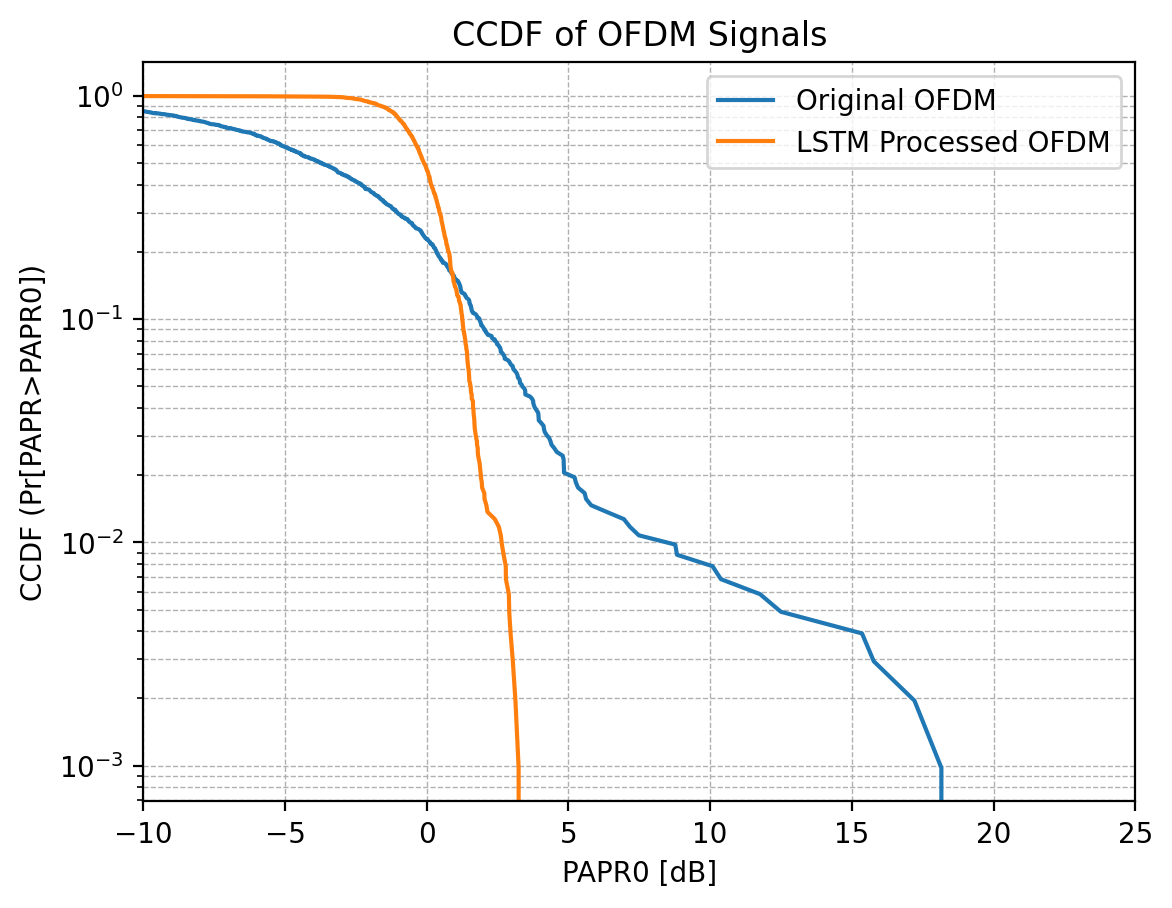

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Define a function to calculate CCDF
def calculate_ccdf(papr_values):
    # Sort the PAPR values in ascending order
    sorted_papr = np.sort(papr_values)

    # Calculate the probability for each value
    prob = 1. * np.arange(len(sorted_papr)) / (len(sorted_papr) - 1)

    # Return the sorted PAPR values and their complementary cumulative probability
    return sorted_papr, 1 - prob

# Calculate PAPR for the original OFDM signal
original_papr_values = np.abs(time_domain_signal)**2 / np.mean(np.abs(time_domain_signal)**2)

# Calculate PAPR for the LSTM modified signal
lstm_papr_values = np.abs(modified_signal.flatten())**2 / np.mean(np.abs(modified_signal.flatten())**2)

# Calculate CCDF for the original and LSTM modified signals
original_papr_sorted, original_ccdf = calculate_ccdf(10 * np.log10(original_papr_values))
lstm_papr_sorted, lstm_ccdf = calculate_ccdf(10 * np.log10(lstm_papr_values))

# Plot the CCDF curves
plt.figure(dpi=200)
plt.semilogy(original_papr_sorted, original_ccdf, label='Original OFDM')
plt.semilogy(lstm_papr_sorted, lstm_ccdf, label='LSTM Processed OFDM')
plt.xlabel('PAPR0 [dB]')
plt.ylabel('CCDF (Pr[PAPR>PAPR0])')
plt.title('CCDF of OFDM Signals')
plt.xlim(-10, 25)  # Set x-axis limits from 0 to 15 dB
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


In [ ]:
# Flatten the signal if it is in parallel frames (not necessary here  it's a single vector)
serial_signal = modified_signal.flatten()  # This is to ensure it's in serial form

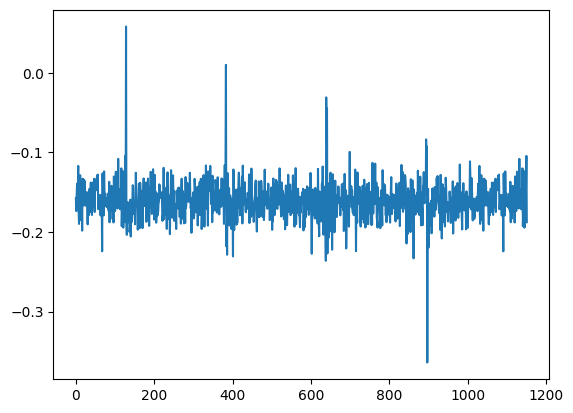

In [ ]:
cp_length = 128
# Adding CP: Take the last 'cp_length' samples and prepend them to the original signal
cyclic_prefix_signal = np.concatenate([serial_signal[-cp_length:], serial_signal])
plt.plot(cyclic_prefix_signal)

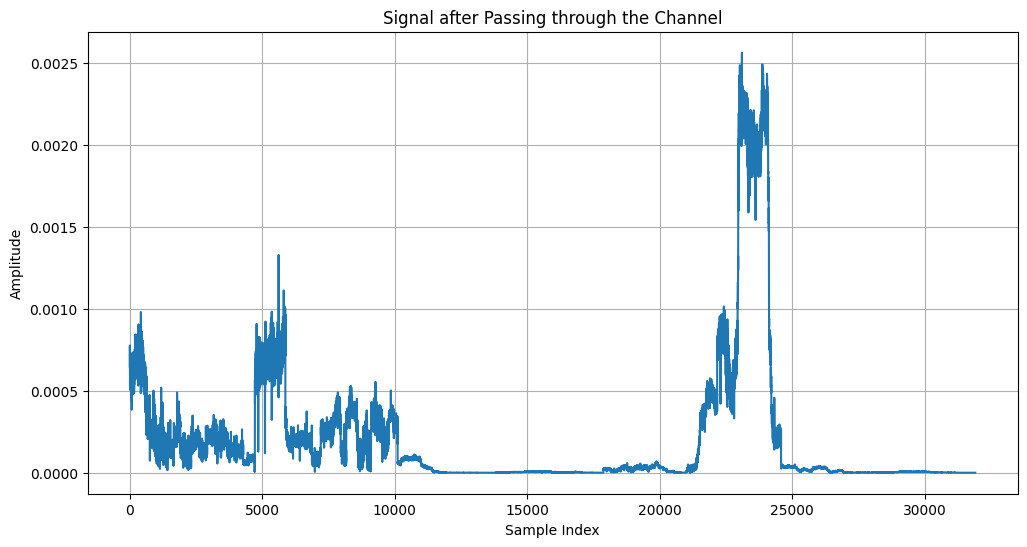

In [ ]:
import pandas as pd
# Placeholder for actual CIR loading code
cir_data = pd.read_csv("cnn_data.csv")
# Extracting the Channel Impulse Response (CIR) data
cir_real = cir_data['Real Part'].to_numpy()
cir_imag = cir_data['Imaginary Part'].to_numpy()
cir = cir_real + 1j*cir_imag  # Combine real and imaginary parts into a complex array

# Apply the CIR to the serial signal through convolution
convolved_signal = np.convolve(cyclic_prefix_signal, cir, mode='same')

# Plotting the convolved signal
plt.figure(figsize=(12, 6))
plt.plot(np.abs(convolved_signal))
plt.title('Signal after Passing through the Channel')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

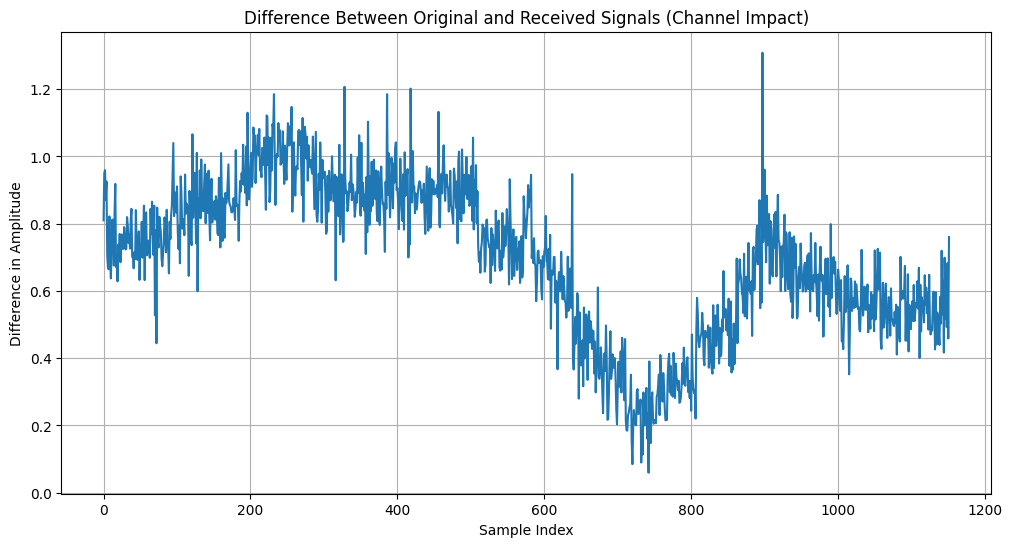

In [ ]:
# Truncate the convolved signal to match the length of the original signal
convolved_signal_truncated = convolved_signal[:len(cyclic_prefix_signal)]

# Normalize both signals again
original_signal_normalized = cyclic_prefix_signal / np.max(np.abs(cyclic_prefix_signal))
convolved_signal_normalized = convolved_signal_truncated / np.max(np.abs(convolved_signal_truncated))

# Calculate the difference (which represents the effect of the channel including noise)
signal_difference = np.abs(convolved_signal_normalized - original_signal_normalized)

# Plotting the effect of the channel
plt.figure(figsize=(12, 6))
plt.plot(signal_difference)
plt.title('Difference Between Original and Received Signals (Channel Impact)')
plt.xlabel('Sample Index')
plt.ylabel('Difference in Amplitude')
plt.grid(True)
plt.show()

# Benchmarks LS,MMSE,FCNN ia present in below snippets

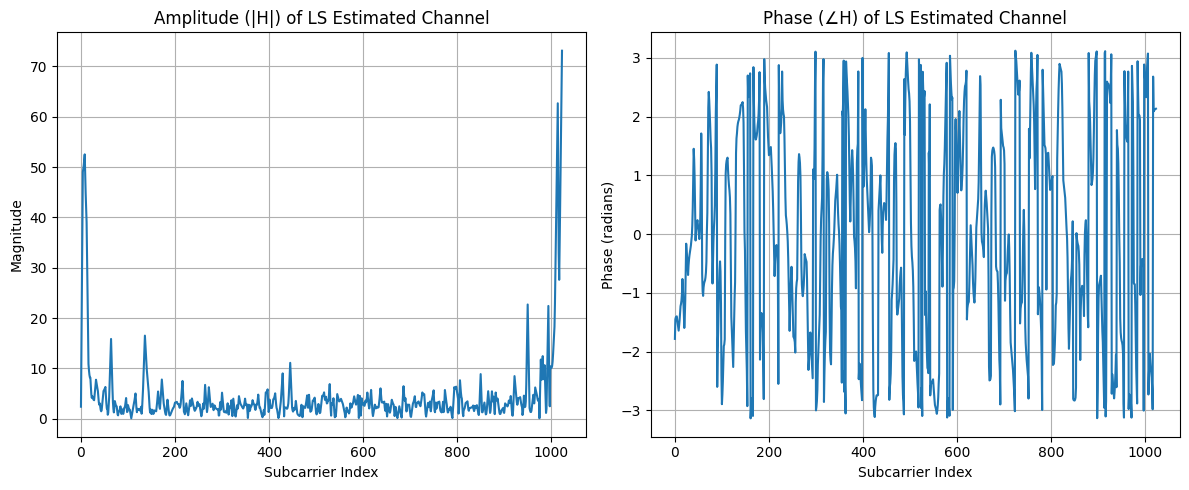

In [ ]:
# Parameters
fft_size = 1024
cyclic_prefix_size = 128
num_subcarriers = 1024
num_pilots = 256

# 1. Remove CP
X_time = cyclic_prefix_signal[cyclic_prefix_size:fft_size + cyclic_prefix_size]
Y_time = convolved_signal_normalized[cyclic_prefix_size:fft_size + cyclic_prefix_size]

# 2. Convert to frequency domain
X_freq = np.fft.fft(X_time, fft_size)
Y_freq = np.fft.fft(Y_time, fft_size)

# 3. Pilot indices
pilot_indices = np.linspace(0, num_subcarriers - 1, num_pilots, dtype=int)
data_indices = np.setdiff1d(np.arange(num_subcarriers), pilot_indices)

# 4. LS Channel Estimation at pilots
H_ls_pilot = Y_freq[pilot_indices] / X_freq[pilot_indices]

# 5. Interpolate to estimate channel at data subcarriers
H_ls_data_real = np.interp(data_indices, pilot_indices, H_ls_pilot.real)
H_ls_data_imag = np.interp(data_indices, pilot_indices, H_ls_pilot.imag)
H_ls = np.zeros(num_subcarriers, dtype=complex)
H_ls[pilot_indices] = H_ls_pilot
H_ls[data_indices] = H_ls_data_real + 1j * H_ls_data_imag

# 6. Equalize received signal
X_estimated = Y_freq[data_indices] / H_ls[data_indices]

# 7. (Optional) Demodulate and calculate BER
# You need the original symbols and bits to calculate BER from X_estimated

# 8. Plot estimated channel amplitude and phase
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(np.abs(H_ls), label="LS Channel Magnitude")
plt.title("Amplitude (|H|) of LS Estimated Channel")
plt.xlabel("Subcarrier Index")
plt.ylabel("Magnitude")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(np.angle(H_ls), label="LS Channel Phase")
plt.title("Phase (∠H) of LS Estimated Channel")
plt.xlabel("Subcarrier Index")
plt.ylabel("Phase (radians)")
plt.grid(True)

plt.tight_layout()
plt.show()


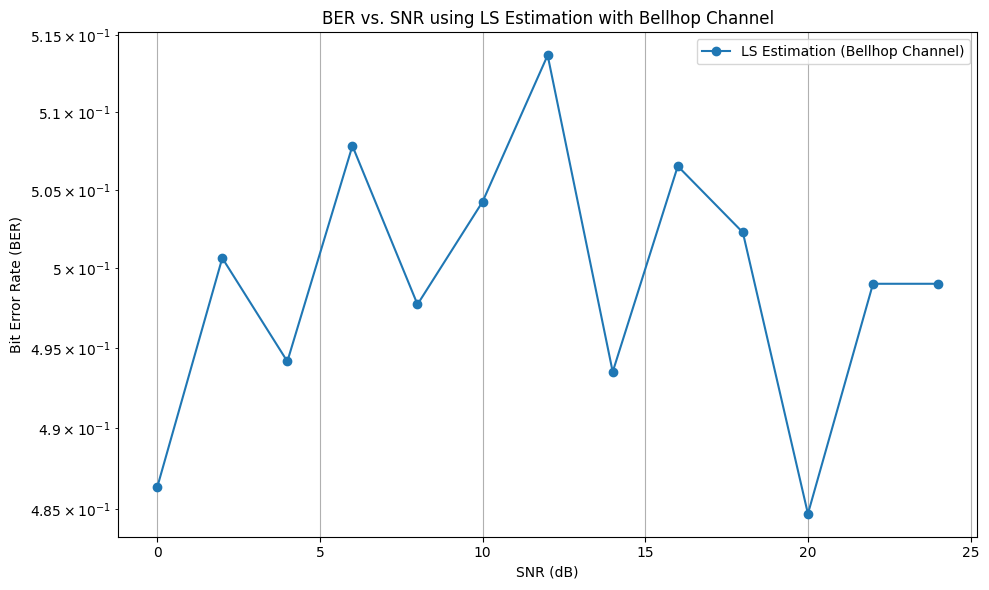

In [ ]:
# Parameters
num_subcarriers = 1024
num_pilots = 256
bits_per_qam_symbol = 4
fft_size = 1024
cyclic_prefix_size = 128
pilot_symbol = 1 + 1j

# Indices
pilot_indices = np.linspace(0, num_subcarriers - 1, num_pilots, dtype=int)
data_indices = np.setdiff1d(np.arange(num_subcarriers), pilot_indices)

# SNR range
snr_range = np.arange(0, 26, 2)
ber_ls = []

# QAM Modulation and Demodulation Functions
def qam16_modulate(bits):
    bit_to_symbol_map = {
        (0, 0, 0, 0): -3 - 3j,
        (0, 0, 0, 1): -3 - 1j,
        (0, 0, 1, 0): -3 + 3j,
        (0, 0, 1, 1): -3 + 1j,
        (0, 1, 0, 0): -1 - 3j,
        (0, 1, 0, 1): -1 - 1j,
        (0, 1, 1, 0): -1 + 3j,
        (0, 1, 1, 1): -1 + 1j,
        (1, 0, 0, 0):  3 - 3j,
        (1, 0, 0, 1):  3 - 1j,
        (1, 0, 1, 0):  3 + 3j,
        (1, 0, 1, 1):  3 + 1j,
        (1, 1, 0, 0):  1 - 3j,
        (1, 1, 0, 1):  1 - 1j,
        (1, 1, 1, 0):  1 + 3j,
        (1, 1, 1, 1):  1 + 1j,
    }
    reshaped_bits = bits.reshape(-1, 4)
    symbols = np.array([bit_to_symbol_map[tuple(b)] for b in reshaped_bits])
    return symbols

def qam16_demodulate(symbols):
    symbol_to_bit_map = {
        -3 - 3j: (0, 0, 0, 0),
        -3 - 1j: (0, 0, 0, 1),
        -3 + 3j: (0, 0, 1, 0),
        -3 + 1j: (0, 0, 1, 1),
        -1 - 3j: (0, 1, 0, 0),
        -1 - 1j: (0, 1, 0, 1),
        -1 + 3j: (0, 1, 1, 0),
        -1 + 1j: (0, 1, 1, 1),
        3 - 3j:  (1, 0, 0, 0),
        3 - 1j:  (1, 0, 0, 1),
        3 + 3j:  (1, 0, 1, 0),
        3 + 1j:  (1, 0, 1, 1),
        1 - 3j:  (1, 1, 0, 0),
        1 - 1j:  (1, 1, 0, 1),
        1 + 3j:  (1, 1, 1, 0),
        1 + 1j:  (1, 1, 1, 1),
    }
    demodulated_bits = []
    for s in symbols:
        min_dist = float('inf')
        closest_point = None
        for constellation_point, bits in symbol_to_bit_map.items():
            dist = abs(s - constellation_point)
            if dist < min_dist:
                min_dist = dist
                closest_point = bits
        demodulated_bits.extend(closest_point)
    return np.array(demodulated_bits)

# Noise Addition Function
def add_noise(signal, snr_db):
    snr_linear = 10 ** (snr_db / 10)
    signal_power = np.mean(np.abs(signal)**2)
    noise_variance = signal_power / snr_linear
    noise = np.sqrt(noise_variance / 2) * (np.random.randn(*signal.shape) + 1j * np.random.randn(*signal.shape))
    return signal + noise
for snr_db in snr_range:
    # 1. Generate bits and modulate
    original_bits = np.random.randint(0, 2, len(data_indices) * bits_per_qam_symbol)
    qam_symbols = qam16_modulate(original_bits)

    # 2. Generate frequency domain OFDM symbol
    X_freq = np.zeros(num_subcarriers, dtype=complex)
    X_freq[pilot_indices] = pilot_symbol
    X_freq[data_indices] = qam_symbols

    # 3. IFFT to get time domain symbol + CP
    X_time = np.fft.ifft(X_freq, fft_size)
    cyclic_prefix = X_time[-cyclic_prefix_size:]
    cyclic_prefix_signal = np.concatenate([cyclic_prefix, X_time])

    # 4. Convolve with Bellhop CIR (already done), now just normalize
    convolved_signal = np.convolve(cyclic_prefix_signal, convolved_signal_normalized)  # channel_cir must be defined
    convolved_signal_truncated = convolved_signal[:len(cyclic_prefix_signal)]
    convolved_signal_normalized = convolved_signal_truncated / np.max(np.abs(convolved_signal_truncated))

    # 5. Add noise
    rx_signal = add_noise(convolved_signal_normalized, snr_db)

    # 6. Remove CP
    Y_time = rx_signal[cyclic_prefix_size:fft_size + cyclic_prefix_size]
    Y_freq = np.fft.fft(Y_time, fft_size)

    # 7. LS estimation
    H_ls_pilot = Y_freq[pilot_indices] / X_freq[pilot_indices]
    H_real = np.interp(data_indices, pilot_indices, H_ls_pilot.real)
    H_imag = np.interp(data_indices, pilot_indices, H_ls_pilot.imag)
    H_est = H_real + 1j * H_imag

    # 8. Equalize
    estimated_symbols = Y_freq[data_indices] / H_est

    # 9. Demodulate and BER
    received_bits = qam16_demodulate(estimated_symbols)
    ber = np.sum(received_bits != original_bits) / len(original_bits)
    ber_ls.append(ber)

# 10. Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.semilogy(snr_range, ber_ls, 'o-', label='LS Estimation (Bellhop Channel)')
plt.title('BER vs. SNR using LS Estimation with Bellhop Channel')
plt.xlabel('SNR (dB)')
plt.ylabel('Bit Error Rate (BER)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


SNR: 0 dB, LS demodulated bits shape: (3072,), Original bits shape: (3072,)
SNR: 0 dB, MMSE demodulated bits shape: (3072,), Original bits shape: (3072,)
SNR: 2 dB, LS demodulated bits shape: (3072,), Original bits shape: (3072,)
SNR: 2 dB, MMSE demodulated bits shape: (3072,), Original bits shape: (3072,)
SNR: 4 dB, LS demodulated bits shape: (3072,), Original bits shape: (3072,)
SNR: 4 dB, MMSE demodulated bits shape: (3072,), Original bits shape: (3072,)
SNR: 6 dB, LS demodulated bits shape: (3072,), Original bits shape: (3072,)
SNR: 6 dB, MMSE demodulated bits shape: (3072,), Original bits shape: (3072,)
SNR: 8 dB, LS demodulated bits shape: (3072,), Original bits shape: (3072,)
SNR: 8 dB, MMSE demodulated bits shape: (3072,), Original bits shape: (3072,)
SNR: 10 dB, LS demodulated bits shape: (3072,), Original bits shape: (3072,)
SNR: 10 dB, MMSE demodulated bits shape: (3072,), Original bits shape: (3072,)
SNR: 12 dB, LS demodulated bits shape: (3072,), Original bits shape: (3072

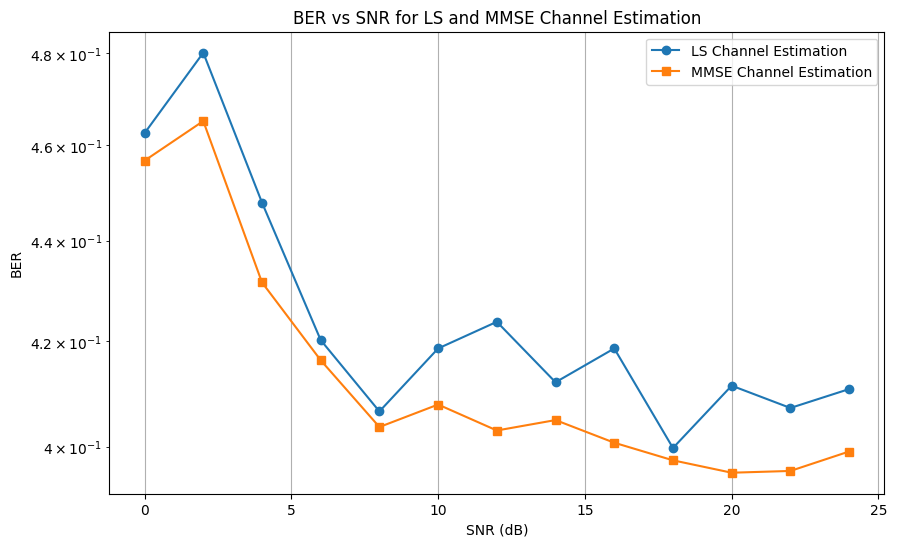

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# OFDM parameters
num_subcarriers = 1024
num_pilots = 256
fft_size = 1024  # Assuming FFT size is equal to the number of subcarriers
cyclic_prefix_size = 128
pilot_value = 1 + 1j  # Use a complex value for pilot symbols
num_symbols = 10
num_bits_per_symbol = 4  # 4 bits per 16-QAM symbol
sampling_rate = 1e6  # Sampling rate for time vector

# Generate random data bits (4 bits per QAM symbol)
data_bits = np.random.randint(0, 2, (num_subcarriers - num_pilots) * num_bits_per_symbol)

# Function to map binary bits to 16-QAM symbols
def bits_to_qam16(bits):
    bits = bits.reshape((-1, 4))
    qam_symbols = 1/np.sqrt(10) * ((2*bits[:,0] + bits[:,1]) * 2 - 3 + 1j*((2*bits[:,2] + bits[:,3]) * 2 - 3))
    return qam_symbols

# Map data bits to 16-QAM symbols
qam_symbols = bits_to_qam16(data_bits)

# Create a function to generate one OFDM symbol
def generate_ofdm_symbol(qam_symbols, num_subcarriers, num_pilots, fft_size, cyclic_prefix_size, pilot_value):
    ofdm_symbol_freq = np.zeros(num_subcarriers, dtype=complex)
    pilot_indices = np.linspace(0, num_subcarriers - 1, num_pilots, dtype=int)
    data_indices = np.setdiff1d(np.arange(num_subcarriers), pilot_indices)
    ofdm_symbol_freq[pilot_indices] = pilot_value
    ofdm_symbol_freq[data_indices] = qam_symbols
    ofdm_symbol_time = np.fft.ifft(ofdm_symbol_freq, fft_size)
    cyclic_prefix = ofdm_symbol_time[-cyclic_prefix_size:]
    ofdm_symbol_with_cp = np.concatenate([cyclic_prefix, ofdm_symbol_time])
    return ofdm_symbol_with_cp

# Generate 10 OFDM symbols
ofdm_symbols = np.zeros((num_symbols, num_subcarriers + cyclic_prefix_size), dtype=complex)
for i in range(num_symbols):
    ofdm_symbols[i] = generate_ofdm_symbol(qam_symbols, num_subcarriers, num_pilots, fft_size, cyclic_prefix_size, pilot_value)

# Perform Parallel to Serial conversion
ofdm_serial_stream = ofdm_symbols.flatten()

# Load Channel Impulse Response (CIR) data
cir_data = pd.read_csv("cnn_data.csv")
cir_real = cir_data['Real Part'].to_numpy()
cir_imag = cir_data['Imaginary Part'].to_numpy()
cir = cir_real + 1j * cir_imag  # Combine real and imaginary parts into a complex array

# Apply the CIR to the serial signal through convolution
convolved_signal = np.convolve(ofdm_serial_stream, cir, mode='full')

# Function to add AWGN noise to the signal
def add_awgn_noise(signal, snr_db):
    signal_power = np.mean(np.abs(signal)**2)
    snr_linear = 10**(snr_db / 10)
    noise_power = signal_power / snr_linear
    noise = np.sqrt(noise_power / 2) * (np.random.randn(*signal.shape) + 1j * np.random.randn(*signal.shape))
    return signal + noise

def ls_channel_estimation(received_signal, transmitted_pilots, pilot_indices):
    # Ensure pilot_indices does not exceed the length of received_signal
    pilot_indices_clipped = np.clip(pilot_indices, 0, len(received_signal) - 1)

    # Extract the received pilot symbols corresponding to pilot_indices_clipped
    received_pilots = received_signal[pilot_indices_clipped]

    # Ensure that received_pilots and transmitted_pilots have the same shape
    transmitted_pilots = transmitted_pilots[:len(received_pilots)]

    # Perform element-wise division for channel estimation
    estimated_channel = received_pilots / transmitted_pilots

    # Interpolate the estimated channel to match the length of received_signal
    return np.interp(np.arange(len(received_signal)), pilot_indices_clipped, estimated_channel)


def mmse_channel_estimation(received_signal, transmitted_pilots, pilot_indices, noise_variance):
    # Ensure that pilot_indices do not exceed the length of received_signal
    pilot_indices_clipped = np.clip(pilot_indices, 0, len(received_signal) - 1)

    # Interpolate the transmitted pilots to match the length of received_signal
    interpolated_transmitted_pilots = np.interp(np.arange(len(received_signal)), pilot_indices, transmitted_pilots)

    # Perform MMSE estimation using the interpolated transmitted pilots
    estimated_channel_ls = ls_channel_estimation(received_signal, interpolated_transmitted_pilots, pilot_indices_clipped)
    h = estimated_channel_ls
    r_hh = np.mean(h * np.conj(h))
    r_yy = np.mean(received_signal * np.conj(received_signal))
    k = r_hh / (r_hh + noise_variance / r_yy)
    estimated_channel_mmse = k * h

    return estimated_channel_mmse

# Demodulate 16-QAM symbols
def demodulate_qam16(symbols):
    constellation = 1/np.sqrt(10) * np.array([(-3 + 1j*-3), (-3 + 1j*-1), (-3 + 1j*1), (-3 + 1j*3),
                                              (-1 + 1j*-3), (-1 + 1j*-1), (-1 + 1j*1), (-1 + 1j*3),
                                              ( 1 + 1j*-3), ( 1 + 1j*-1), ( 1 + 1j*1), ( 1 + 1j*3),
                                              ( 3 + 1j*-3), ( 3 + 1j*-1), ( 3 + 1j*1), ( 3 + 1j*3)])
    demod_bits = np.array([np.argmin(np.abs(symbol - constellation)) for symbol in symbols])
    demod_bits = np.unpackbits(demod_bits.astype(np.uint8), bitorder='big').reshape(-1, 8)[:, 4:].flatten()
    return demod_bits

# Calculate BER
def calculate_ber(original_bits, received_bits):
    errors = np.sum(original_bits != received_bits)
    return errors / len(original_bits)

# SNR range
snr_range = np.arange(0, 26, 2)
ber_ls = []
ber_mmse = []

for snr in snr_range:
    # Add noise
    noisy_signal = add_awgn_noise(convolved_signal, snr)

    # Ensure that the length of noisy_signal is an integer multiple of (num_subcarriers + cyclic_prefix_size)
    total_length = num_symbols * (num_subcarriers + cyclic_prefix_size)
    noisy_signal = noisy_signal[:total_length]

    # Serial to Parallel conversion
    received_symbols = noisy_signal.reshape((num_symbols, num_subcarriers + cyclic_prefix_size))

    # Remove cyclic prefix
    received_symbols_no_cp = received_symbols[:, cyclic_prefix_size:]

    # Perform FFT to convert to frequency domain
    received_freq_symbols = np.fft.fft(received_symbols_no_cp, fft_size, axis=1)

    # Extract pilot and data symbols
    pilot_indices = np.linspace(0, num_subcarriers - 1, num_pilots, dtype=int)
    data_indices = np.setdiff1d(np.arange(num_subcarriers), pilot_indices)
    transmitted_pilots = np.full(num_pilots, pilot_value)

    # Channel estimation using LS
    estimated_channel_ls = ls_channel_estimation(received_freq_symbols.flatten(), transmitted_pilots, pilot_indices)

    # Equalize the signal using LS channel estimates
    equalized_signal_ls = received_freq_symbols.flatten() / estimated_channel_ls

    # Demodulate the equalized signal
    demodulated_bits_ls = demodulate_qam16(equalized_signal_ls[data_indices])

    # Calculate BER for LS
    print(f"SNR: {snr} dB, LS demodulated bits shape: {demodulated_bits_ls.shape}, Original bits shape: {data_bits.shape}")
    ber_ls.append(calculate_ber(data_bits, demodulated_bits_ls))

    # Channel estimation using MMSE
    noise_variance = np.mean(np.abs(noisy_signal)**2) / (10**(snr / 10))
    estimated_channel_mmse = mmse_channel_estimation(received_freq_symbols.flatten(), transmitted_pilots, pilot_indices, noise_variance)

    # Equalize the signal using MMSE channel estimates
    equalized_signal_mmse = received_freq_symbols.flatten() / estimated_channel_mmse

    # Demodulate the equalized signal
    demodulated_bits_mmse = demodulate_qam16(equalized_signal_mmse[data_indices])

    # Calculate BER for MMSE
    print(f"SNR: {snr} dB, MMSE demodulated bits shape: {demodulated_bits_mmse.shape}, Original bits shape: {data_bits.shape}")
    ber_mmse.append(calculate_ber(data_bits, demodulated_bits_mmse))

# Plot BER vs SNR curves
plt.figure(figsize=(10, 6))
plt.semilogy(snr_range, ber_ls, 'o-', label='LS Channel Estimation')
plt.semilogy(snr_range, ber_mmse, 's-', label='MMSE Channel Estimation')
plt.xlabel('SNR (dB)')
plt.ylabel('BER')
plt.title('BER vs SNR for LS and MMSE Channel Estimation')
plt.grid(True)
plt.legend()
plt.show()


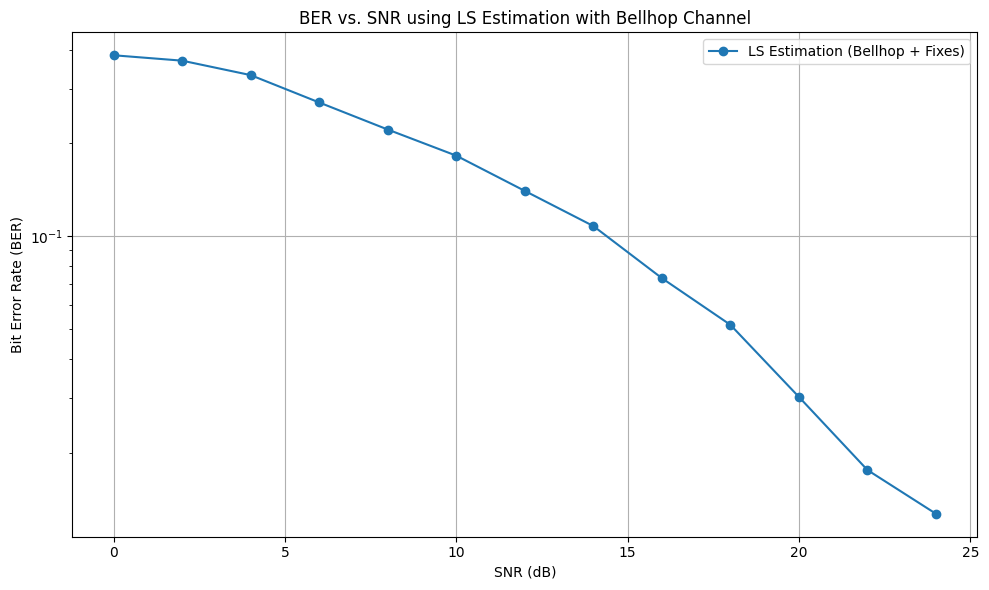

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# -------------------------------
# QAM Modulation/Demodulation
# -------------------------------
def qam16_modulate(bits):
    bit_to_symbol_map = {
        (0, 0, 0, 0): -3 - 3j, (0, 0, 0, 1): -3 - 1j, (0, 0, 1, 0): -3 + 3j, (0, 0, 1, 1): -3 + 1j,
        (0, 1, 0, 0): -1 - 3j, (0, 1, 0, 1): -1 - 1j, (0, 1, 1, 0): -1 + 3j, (0, 1, 1, 1): -1 + 1j,
        (1, 0, 0, 0):  3 - 3j, (1, 0, 0, 1):  3 - 1j, (1, 0, 1, 0):  3 + 3j, (1, 0, 1, 1):  3 + 1j,
        (1, 1, 0, 0):  1 - 3j, (1, 1, 0, 1):  1 - 1j, (1, 1, 1, 0):  1 + 3j, (1, 1, 1, 1):  1 + 1j,
    }
    reshaped_bits = bits.reshape(-1, 4)
    return np.array([bit_to_symbol_map[tuple(b)] for b in reshaped_bits])

def qam16_demodulate(symbols):
    symbol_to_bit_map = {
        -3 - 3j: (0, 0, 0, 0), -3 - 1j: (0, 0, 0, 1), -3 + 3j: (0, 0, 1, 0), -3 + 1j: (0, 0, 1, 1),
        -1 - 3j: (0, 1, 0, 0), -1 - 1j: (0, 1, 0, 1), -1 + 3j: (0, 1, 1, 0), -1 + 1j: (0, 1, 1, 1),
         3 - 3j: (1, 0, 0, 0),  3 - 1j: (1, 0, 0, 1),  3 + 3j: (1, 0, 1, 0),  3 + 1j: (1, 0, 1, 1),
         1 - 3j: (1, 1, 0, 0),  1 - 1j: (1, 1, 0, 1),  1 + 3j: (1, 1, 1, 0),  1 + 1j: (1, 1, 1, 1),
    }
    demodulated_bits = []
    for s in symbols:
        closest = min(symbol_to_bit_map.keys(), key=lambda c: abs(s - c))
        demodulated_bits.extend(symbol_to_bit_map[closest])
    return np.array(demodulated_bits)

# -------------------------------
# Add Noise Function
# -------------------------------
def add_noise(signal, snr_db):
    snr_linear = 10 ** (snr_db / 10)
    power = np.mean(np.abs(signal)**2)
    noise_power = power / snr_linear
    noise = np.sqrt(noise_power / 2) * (np.random.randn(*signal.shape) + 1j * np.random.randn(*signal.shape))
    return signal + noise

# -------------------------------
# Simulation Parameters
# -------------------------------
num_subcarriers = 1024
num_pilots = 512  # Increased for better LS estimation
fft_size = 1024
cp_size = 128
pilot_symbol = 1 + 1j
bits_per_qam = 4

pilot_indices = np.linspace(0, num_subcarriers - 1, num_pilots, dtype=int)
data_indices = np.setdiff1d(np.arange(num_subcarriers), pilot_indices)

# -------------------------------
# Load & Normalize Bellhop CIR
# -------------------------------
# channel_cir = ...  # <- Must be loaded or defined externally
channel_cir = np.random.randn(40) + 1j * np.random.randn(40)  # TEMP placeholder
#channel_cir=cir
channel_cir = channel_cir / np.linalg.norm(channel_cir)  # Normalize energy

# -------------------------------
# BER vs. SNR Evaluation
# -------------------------------
snr_range = np.arange(0, 26, 2)
ber_ls = []

for snr_db in snr_range:
    # 1. Generate random bits & modulate
    original_bits = np.random.randint(0, 2, len(data_indices) * bits_per_qam)
    tx_symbols = qam16_modulate(original_bits)

    # 2. Create OFDM frame (Freq)
    X_freq = np.zeros(num_subcarriers, dtype=complex)
    X_freq[pilot_indices] = pilot_symbol
    X_freq[data_indices] = tx_symbols

    # 3. Time domain conversion + CP
    X_time = np.fft.ifft(X_freq)
    tx_time_cp = np.concatenate([X_time[-cp_size:], X_time])

    # 4. Convolution with Bellhop CIR
    convolved = np.convolve(tx_time_cp, channel_cir)
    rx_time = convolved[:len(tx_time_cp)]  # truncate

    # Optional: Normalize signal power
    rx_time = rx_time / np.sqrt(np.mean(np.abs(rx_time)**2))

    # 5. Add AWGN
    rx_time_noisy = add_noise(rx_time, snr_db)

    # 6. Remove CP & FFT
    Y_time = rx_time_noisy[cp_size:fft_size + cp_size]
    Y_freq = np.fft.fft(Y_time)

    # 7. LS Estimation (cubic interp)
    H_pilot = Y_freq[pilot_indices] / pilot_symbol
    H_interp_real = interp1d(pilot_indices, H_pilot.real, kind='cubic', fill_value="extrapolate")
    H_interp_imag = interp1d(pilot_indices, H_pilot.imag, kind='cubic', fill_value="extrapolate")
    H_est = np.zeros(num_subcarriers, dtype=complex)
    H_est[pilot_indices] = H_pilot
    H_est[data_indices] = H_interp_real(data_indices) + 1j * H_interp_imag(data_indices)

    # 8. Equalization
    received_symbols = Y_freq[data_indices] / H_est[data_indices]

    # 9. Demodulate & compute BER
    received_bits = qam16_demodulate(received_symbols)
    ber = np.sum(received_bits != original_bits) / len(original_bits)
    ber_ls.append(ber)

# -------------------------------
# Plot BER vs. SNR
# -------------------------------
plt.figure(figsize=(10, 6))
plt.semilogy(snr_range, ber_ls, 'o-', label='LS Estimation (Bellhop + Fixes)')
plt.xlabel("SNR (dB)")
plt.ylabel("Bit Error Rate (BER)")
plt.title("BER vs. SNR using LS Estimation with Bellhop Channel")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


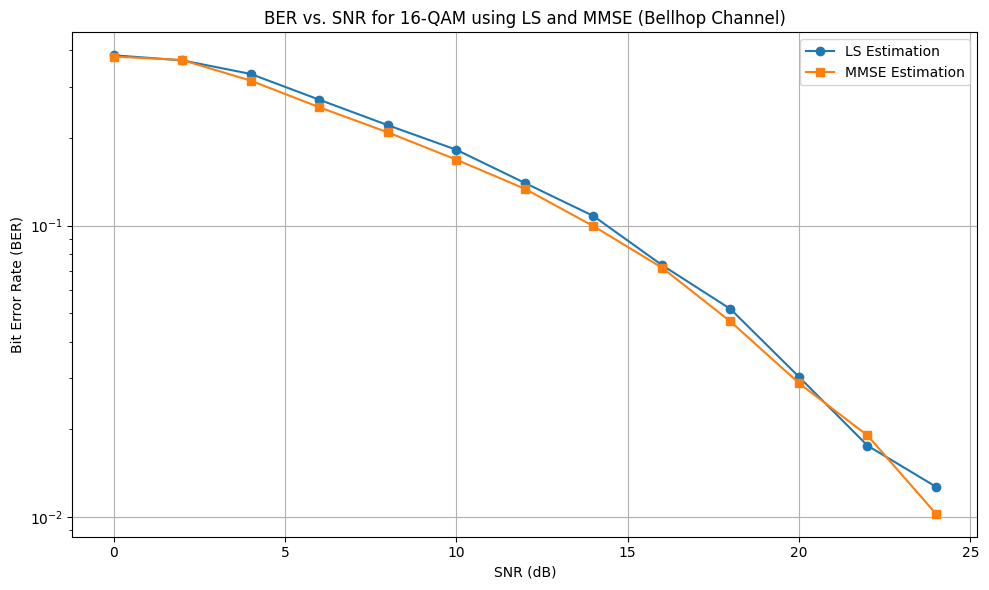

In [ ]:
ber_mmse = []

for snr_db in snr_range:
    # 1. Generate bits and modulate
    original_bits = np.random.randint(0, 2, len(data_indices) * bits_per_qam)
    tx_symbols = qam16_modulate(original_bits)

    # 2. Create OFDM symbol (freq)
    X_freq = np.zeros(num_subcarriers, dtype=complex)
    X_freq[pilot_indices] = pilot_symbol
    X_freq[data_indices] = tx_symbols

    # 3. IFFT + CP
    X_time = np.fft.ifft(X_freq)
    tx_time_cp = np.concatenate([X_time[-cp_size:], X_time])

    # 4. Bellhop channel
    convolved = np.convolve(tx_time_cp, channel_cir)
    rx_time = convolved[:len(tx_time_cp)]
    rx_time = rx_time / np.sqrt(np.mean(np.abs(rx_time)**2))

    # 5. Add noise
    rx_time_noisy = add_noise(rx_time, snr_db)

    # 6. Remove CP and FFT
    Y_time = rx_time_noisy[cp_size:fft_size + cp_size]
    Y_freq = np.fft.fft(Y_time)

    # 7. LS Estimation
    H_pilot_ls = Y_freq[pilot_indices] / pilot_symbol

    # 8. MMSE Estimation (element-wise approximation)
    snr_linear = 10 ** (snr_db / 10)
    sigma_H2 = 1  # channel power
    sigma_n2 = 1 / snr_linear
    gain_mmse = sigma_H2 / (sigma_H2 + sigma_n2)
    H_pilot_mmse = gain_mmse * H_pilot_ls

    # 9. Interpolation for MMSE
    interp_real = interp1d(pilot_indices, H_pilot_mmse.real, kind='cubic', fill_value="extrapolate")
    interp_imag = interp1d(pilot_indices, H_pilot_mmse.imag, kind='cubic', fill_value="extrapolate")
    H_est_mmse = np.zeros(num_subcarriers, dtype=complex)
    H_est_mmse[pilot_indices] = H_pilot_mmse
    H_est_mmse[data_indices] = interp_real(data_indices) + 1j * interp_imag(data_indices)

    # 10. Equalization
    received_mmse = Y_freq[data_indices] / H_est_mmse[data_indices]

    # 11. Demodulate and BER
    received_bits_mmse = qam16_demodulate(received_mmse)
    ber = np.sum(received_bits_mmse != original_bits) / len(original_bits)
    ber_mmse.append(ber)
plt.figure(figsize=(10, 6))
plt.semilogy(snr_range, ber_ls, 'o-', label='LS Estimation')
plt.semilogy(snr_range, ber_mmse, 's-', label='MMSE Estimation')
plt.title('BER vs. SNR for 16-QAM using LS and MMSE (Bellhop Channel)')
plt.xlabel('SNR (dB)')
plt.ylabel('Bit Error Rate (BER)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


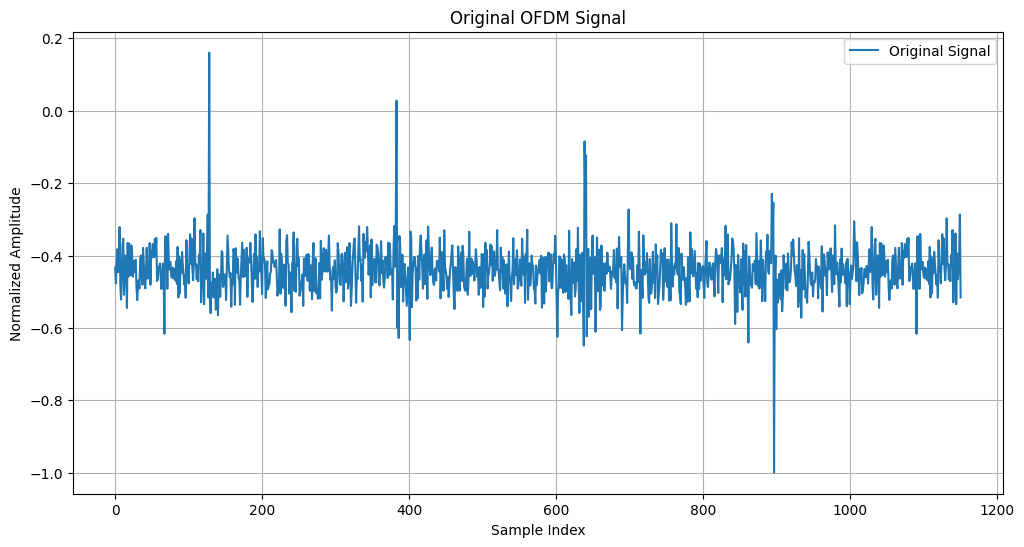

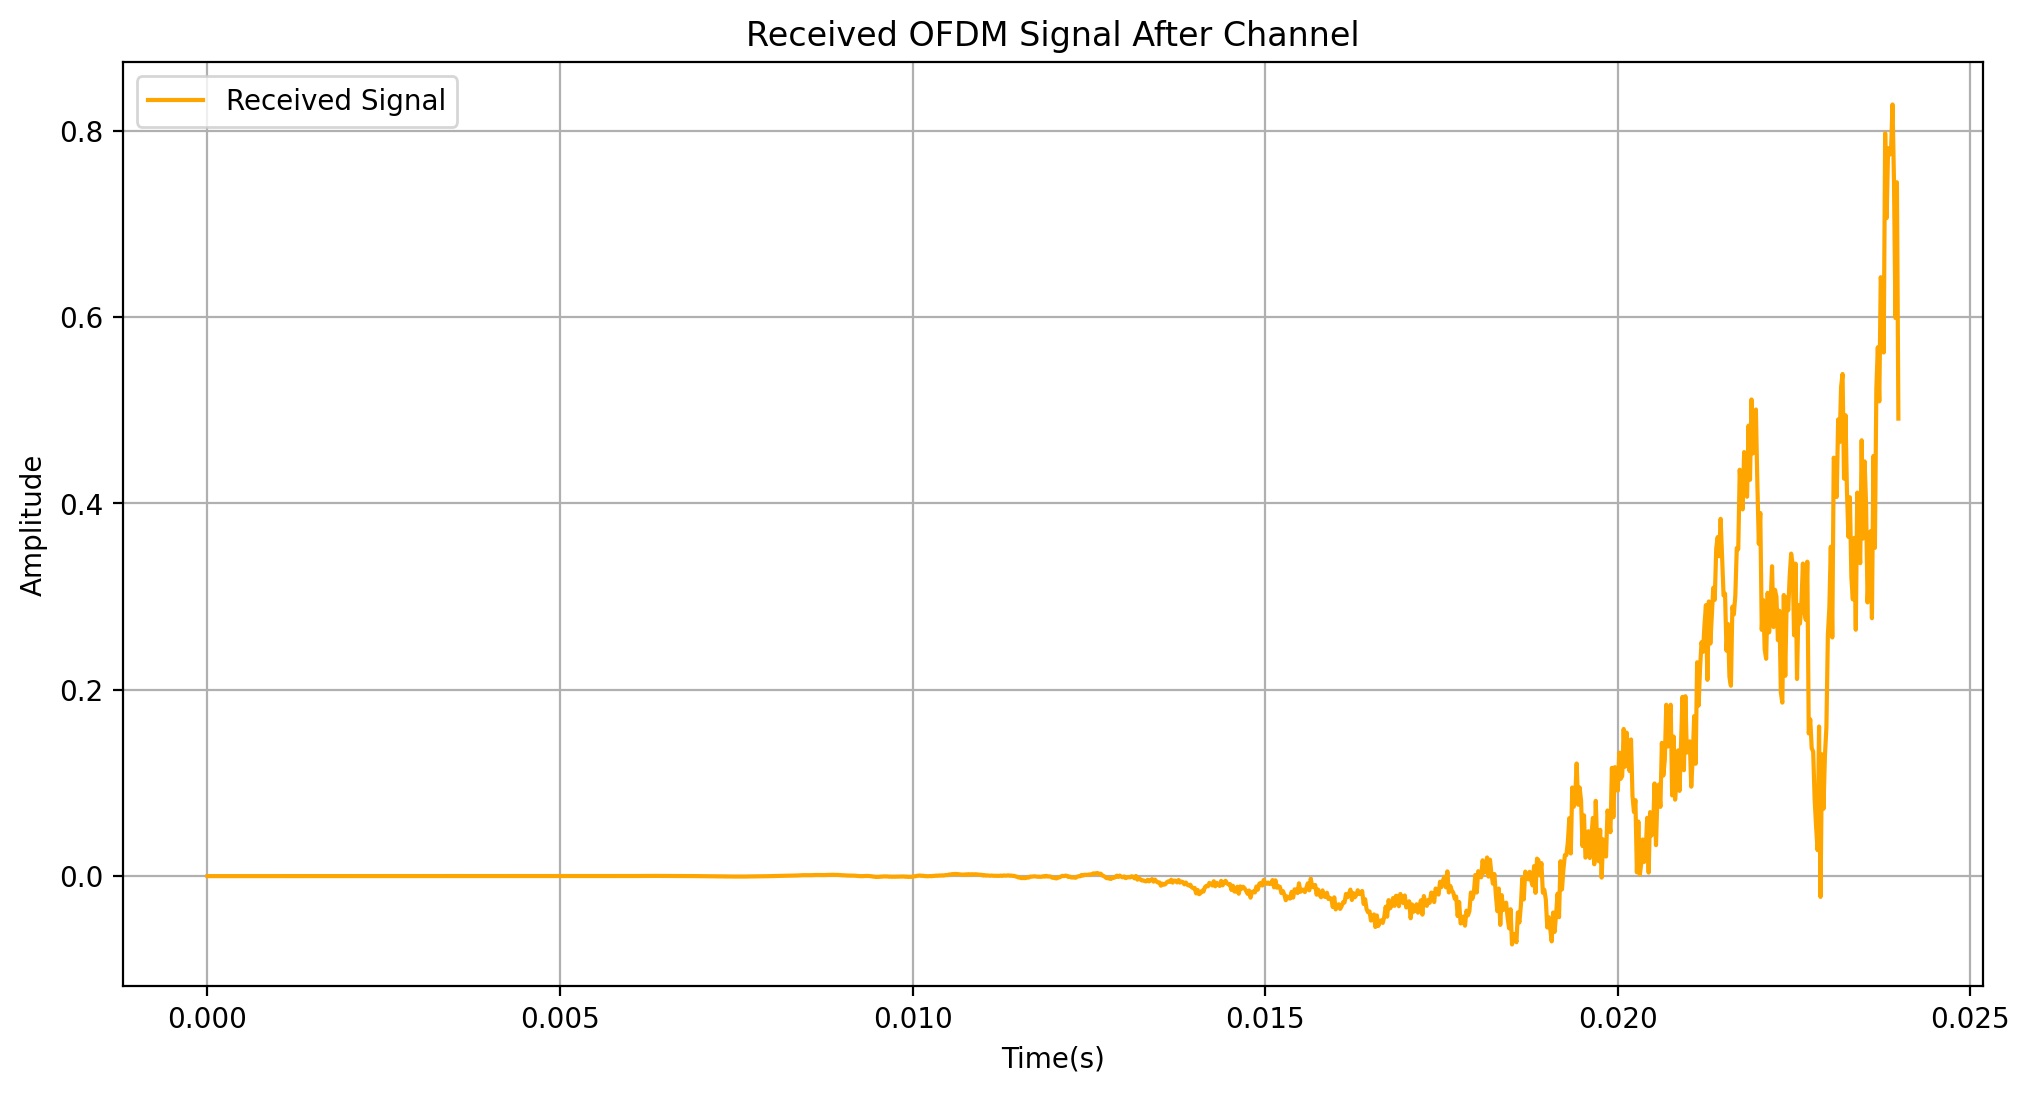

In [ ]:

# Original Signal
plt.figure(figsize=(12, 6))
plt.plot((original_signal_normalized), label='Original Signal')
plt.title('Original OFDM Signal')
plt.xlabel('Sample Index')
plt.ylabel('Normalized Amplitude')
plt.grid(True)
plt.legend()
plt.show()
time_vector_cp = np.arange(len(convolved_signal_normalized)) / sampling_rate
# Received Signal After Channel
plt.figure(figsize=(12, 6),dpi=200)
plt.plot(time_vector_cp,(convolved_signal_normalized), label='Received Signal', color='orange')
plt.title('Received OFDM Signal After Channel')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Local Mean Decomposition
#signal:
#window_size:
import numpy as np
def local_mean_decomposition(signal, window_size, num_iterations):
    residual = signal.copy()
    detail_signals = []

    for _ in range(num_iterations):
        local_mean = np.convolve(residual, np.ones(window_size) / window_size, mode='same')
        detail = residual - local_mean
        detail_signals.append(detail)
        residual = local_mean

    trend_signal = signal - np.sum(detail_signals, axis=0)
    return trend_signal, detail_signals

# Set LMD parameters
window_size = 100
num_iterations = 5

# Apply Local Mean Decomposition (LMD)
trend_real, detail_signals_real = local_mean_decomposition((convolved_signal_normalized), window_size, num_iterations)

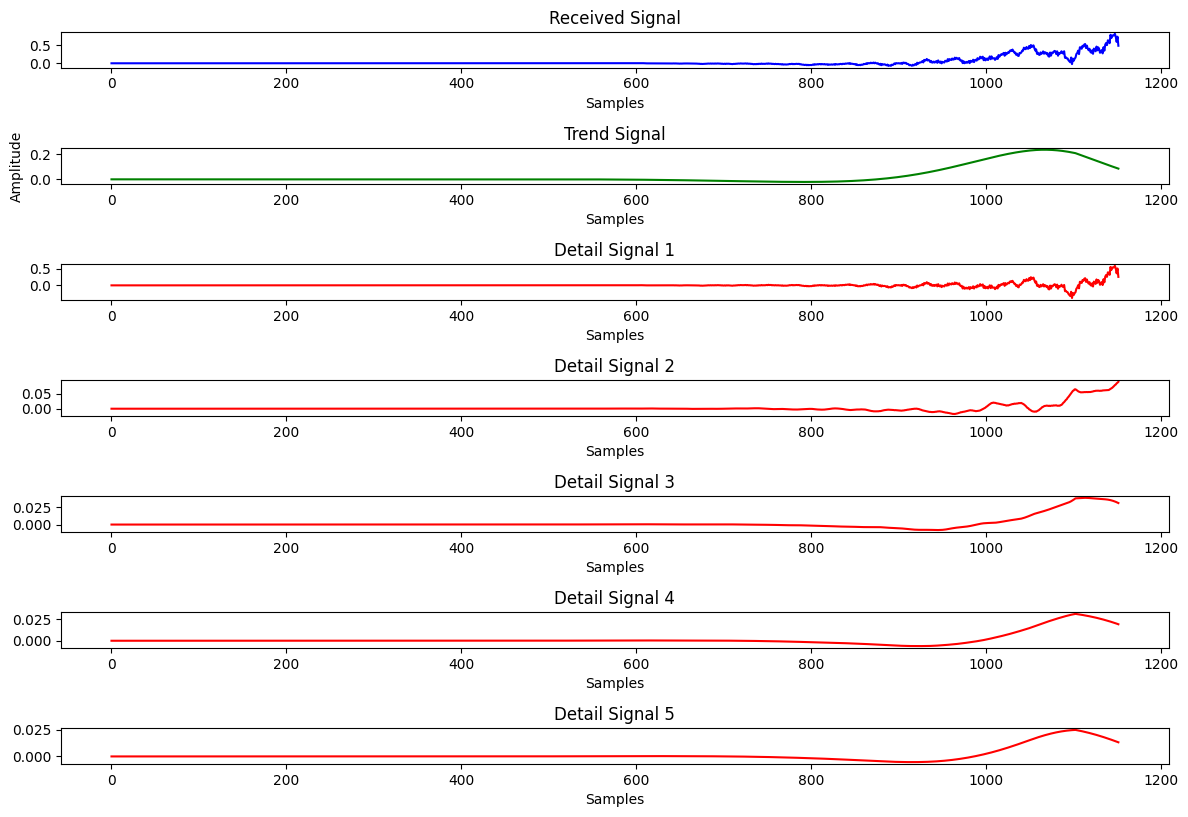

In [ ]:
# Plot the LMD components for the real part of received signal
num_components = len(detail_signals_real) + 1
plt.figure(figsize=(12,9), dpi=100)

# Plot received signal (real)
plt.subplot(num_components + 2, 1, 1)
plt.plot(convolved_signal_normalized, color='blue')
plt.xlabel('Samples')
#plt.ylabel(Amplitude)
plt.title('Received Signal')

# Plot trend signal
plt.subplot(num_components + 2, 1, 2)
plt.plot(trend_real, color='green')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('Trend Signal')

# Plot detail signals
for i, detail_signal in enumerate(detail_signals_real):
    plt.subplot(num_components + 2, 1, i + 3)
    plt.plot(detail_signal, color='red')
    plt.xlabel('Samples')
    #plt.ylabel('Amplitude')
    plt.title(f'Detail Signal {i + 1}')

plt.tight_layout()
plt.show()

In [ ]:
pip install EMD-signal


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.8 MB/s eta 0:00:00


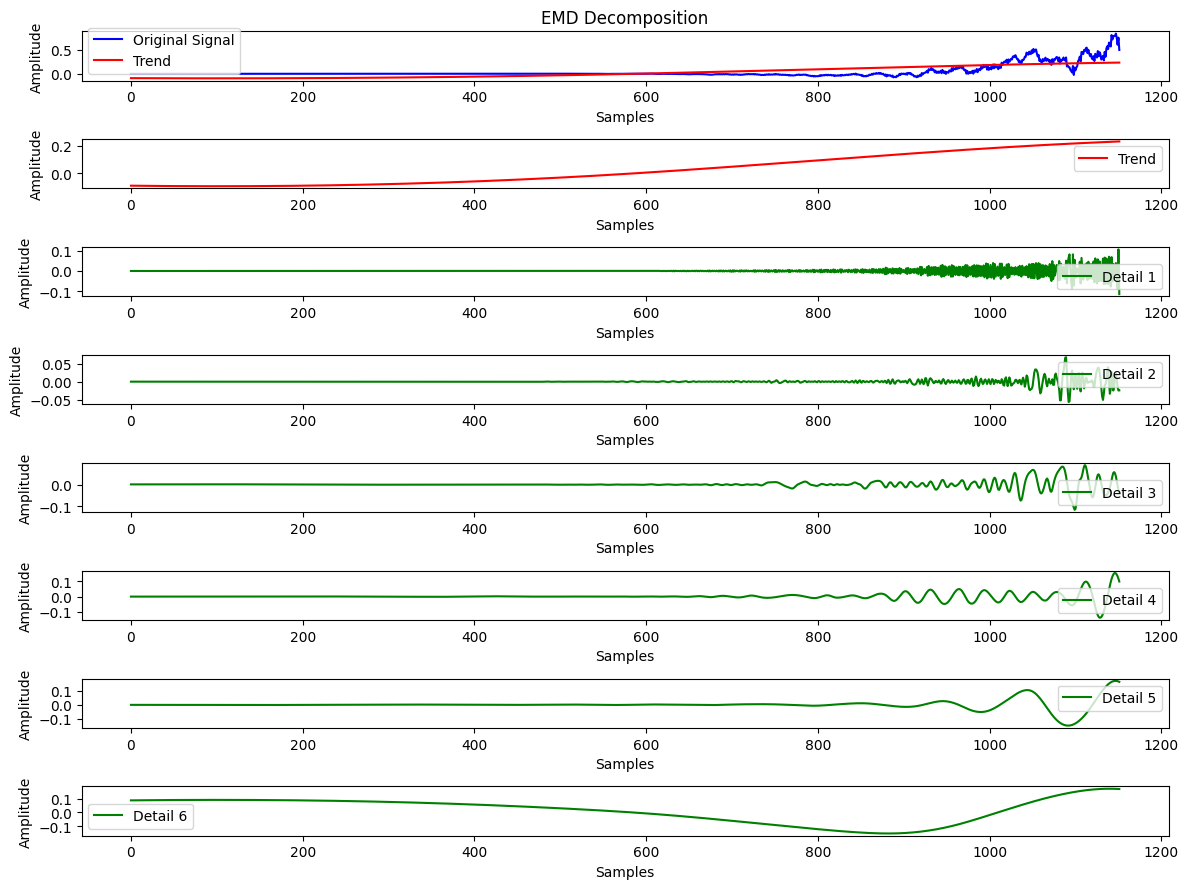

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PyEMD import EMD

def emd_decomposition(signal):
    # Ensure the signal is real-valued
    signal = np.real(signal)

    # Initialize EMD instance
    emd = EMD()

    # Execute EMD on the signal
    imfs = emd.emd(signal)

    # Extract trend and detail signals
    trend_signal = imfs[-1]  # The last IMF is considered as the trend
    detail_signals = imfs[:-1]  # Remaining IMFs are considered as details
    return trend_signal, detail_signals

# Assume `convolved_signal_normalized` is already defined
# Ensure `convolved_signal_normalized` is real-valued
convolved_signal_normalized = np.real(convolved_signal_normalized)

# Apply Empirical Mode Decomposition (EMD)
trend_real, detail_signals_real = emd_decomposition(convolved_signal_normalized)

# Define a function to plot the results clearly
def plot_emd_clearly(signal, trend, details, title="EMD Decomposition"):
    num_details = len(details)  # Number of detail signals
    plt.figure(figsize=(12, 9), dpi=100)

    # Plot original signal and trend signal
    plt.subplot(num_details + 2, 1, 1)
    plt.plot(signal, label='Original Signal', color='blue')
    plt.plot(trend, label='Trend', color='red')
    plt.title(title)
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.legend()

    # Plot trend signal separately
    plt.subplot(num_details + 2, 1, 2)
    plt.plot(trend, label='Trend', color='red')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.legend()

    # Plot detail signals
    for i, detail in enumerate(details):
        plt.subplot(num_details + 2, 1, i + 3)
        plt.plot(detail, label=f'Detail {i+1}', color='green')
        plt.xlabel('Samples')
        plt.ylabel('Amplitude')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Plot the results clearly
plot_emd_clearly(convolved_signal_normalized, trend_real, detail_signals_real)


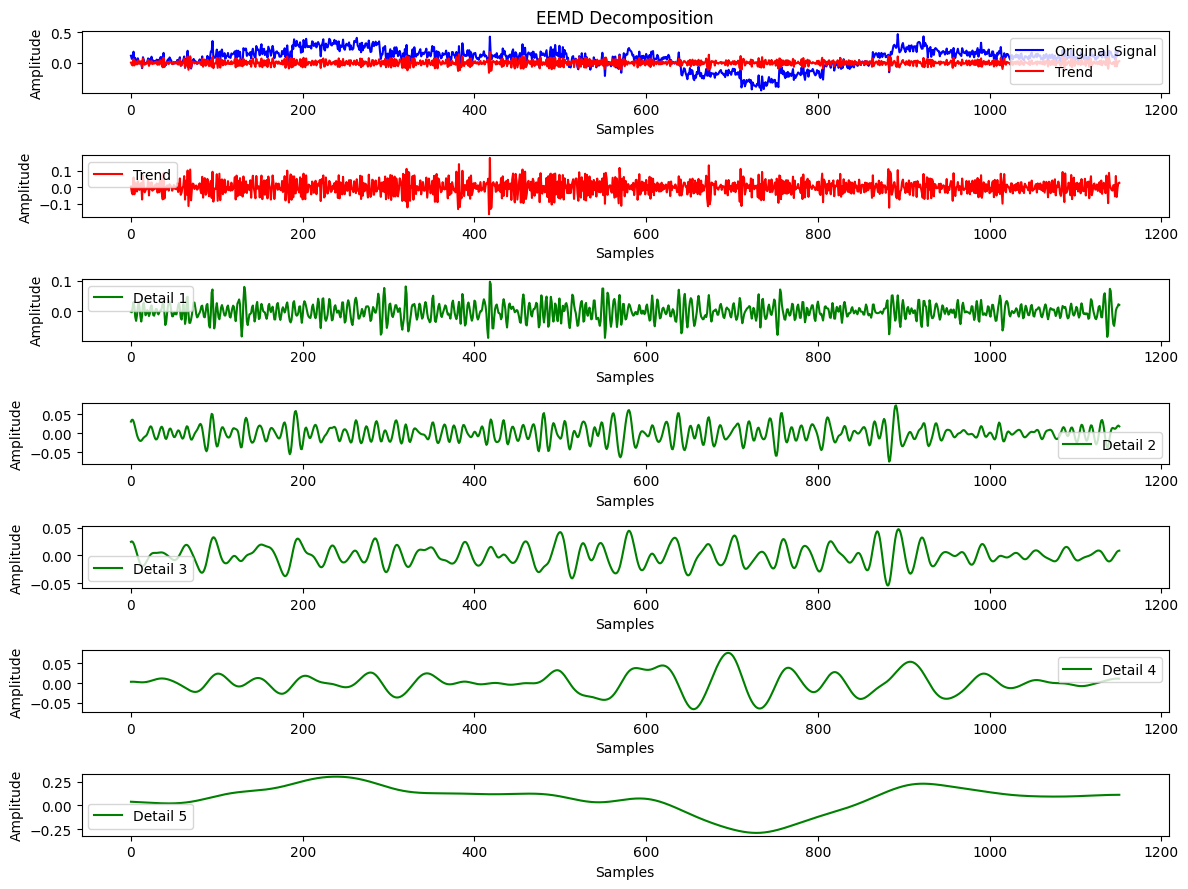

In [ ]:
from PyEMD import EEMD
import numpy as np
import matplotlib.pyplot as plt

def eemd_decomposition(signal, num_iterations):
    # Ensure the signal is real-valued
    signal = np.real(signal)

    # Initialize EEMD instance
    eemd = EEMD()

    # Execute EEMD on the signal
    eIMFs = eemd.eemd(signal, max_imf=num_iterations)

    # Extract trend and detail signals
    trend_signal = eIMFs[0]  # The first IMF is considered as the trend
    detail_signals = eIMFs[1:]  # Remaining IMFs are considered as details
    return trend_signal, detail_signals

# Apply Ensemble Empirical Mode Decomposition (EEMD) with 5 iterations
num_iterations = 5
trend_real, detail_signals_real = eemd_decomposition(convolved_signal_normalized, num_iterations)

# Define a function to plot the results clearly up to 5 iterations
def plot_eemd_clearly(signal, trend, details, num_iterations, title="EEMD Decomposition"):
    num_details = min(len(details), num_iterations)  # Limit the number of detail signals to plot
    plt.figure(figsize=(12, 9), dpi=100)

    # Plot original signal and trend signal
    plt.subplot(num_iterations + 2, 1, 1)
    plt.plot(signal, label='Original Signal', color='blue')
    plt.plot(trend, label='Trend', color='red')
    plt.title(title)
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.legend()

    # Plot trend signal separately
    plt.subplot(num_iterations + 2, 1, 2)
    plt.plot(trend, label='Trend', color='red')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.legend()

    # Plot detail signals up to 5 iterations
    for i, detail in enumerate(details[:num_iterations]):
        plt.subplot(num_iterations + 2, 1, i + 3)
        plt.plot(detail, label=f'Detail {i+1}', color='green')
        plt.xlabel('Samples')
        plt.ylabel('Amplitude')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Plot the results up to 5 iterations clearly
plot_eemd_clearly(convolved_signal_normalized, trend_real, detail_signals_real, num_iterations)


In [ ]:
# Sampling rate
sampling_rate = 48000  # Hz

# Number of subcarriers
num_subcarriers = 1024

# Frequency resolution
freq_resolution = sampling_rate / num_subcarriers

# Frequency axis
freq = np.fft.fftfreq(num_subcarriers, 1 / sampling_rate)
freq

array([   0.   ,   46.875,   93.75 , ..., -140.625,  -93.75 ,  -46.875])

In [ ]:
convolved_signal_normalized = convolved_signal_truncated / np.max(np.abs(convolved_signal_truncated))

# Apply Ensemble Empirical Mode Decomposition (EEMD) with 5 iterations
num_iterations = 5
trend_real, detail_signals_real = eemd_decomposition(convolved_signal_normalized, num_iterations)

def remove_cp(signal, cp_size):
    return signal[cp_size:]

def serial_to_parallel(signal, block_size):
    # Assuming the signal length is a multiple of block_size
    return signal.reshape(-1, block_size)

def perform_fft(data_blocks):
    return np.fft.fft(data_blocks, axis=1)

# cyclic prefix size and block size after CP removal
cp_size = 128
block_size = 1024

# Process signal
signal_no_cp = remove_cp(trend_real, cp_size)
signal_blocks = serial_to_parallel(signal_no_cp, block_size)
fft_result = perform_fft(signal_blocks)

import matplotlib.pyplot as plt
import numpy as np

# Number of blocks to plot (adjust as needed, e.g., if there are many blocks)
num_blocks_to_plot = min(5, signal_blocks.shape[0])  # Plot up to 5 blocks for clarity

plt.figure(figsize=(12, 6 * num_blocks_to_plot),dpi=200)
for i in range(num_blocks_to_plot):
    plt.subplot(num_blocks_to_plot, 1, i + 1)
    plt.plot(freq ,np.abs(fft_result[i]), label=f'Block {i + 1}')
    plt.title(f'FFT Magnitude')
    plt.grid(True)
    plt.legend()
    plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

NameError: name 'eemd_decomposition' is not defined

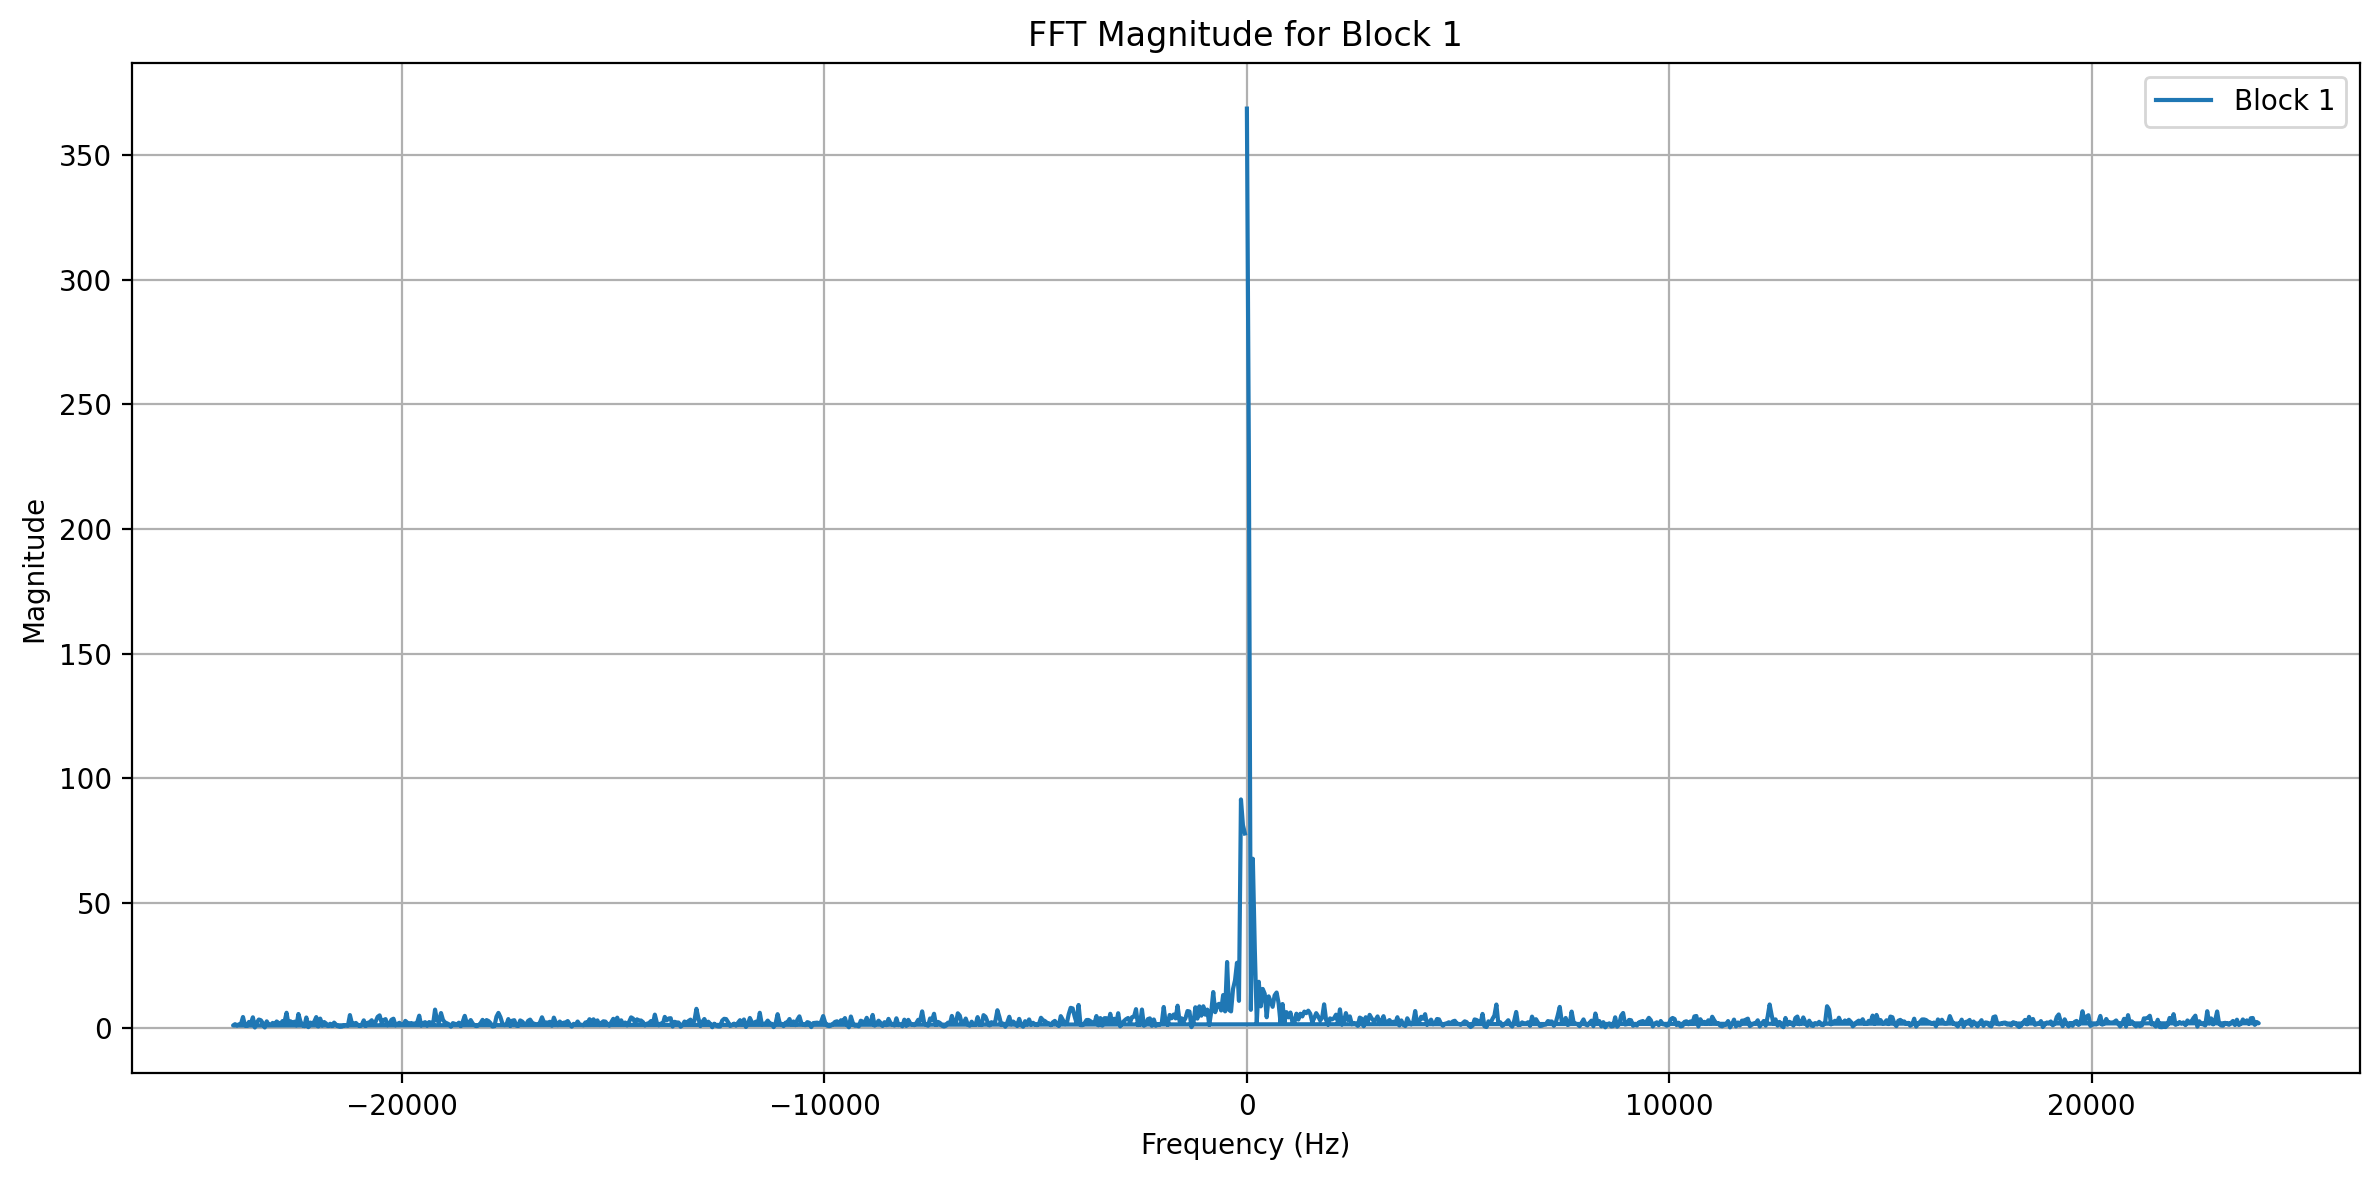

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to remove cyclic prefix
def remove_cp(signal, cp_size):
    return signal[cp_size:]

# Function to perform serial to parallel conversion
def serial_to_parallel(signal, block_size):
    return signal.reshape(-1, block_size)

# Function to perform FFT
def perform_fft(data_blocks):
    return np.fft.fft(data_blocks, axis=1)

# Assuming convolved_signal_normalized is defined
convolved_signal_normalized = convolved_signal_truncated / np.max(np.abs(convolved_signal_truncated))

# Remove cyclic prefix
signal_no_cp = remove_cp(convolved_signal_normalized, cp_size)

# Perform serial to parallel conversion
signal_blocks = serial_to_parallel(signal_no_cp, block_size)

# Perform FFT
fft_result = perform_fft(signal_blocks)

# Calculate the frequency vector
sampling_rate = 48000  # Example sampling rate in Hz
num_fft_points = fft_result.shape[1]
freq = np.fft.fftfreq(num_fft_points, d=1/sampling_rate)

# Plot the FFT magnitude for the first few blocks
num_blocks_to_plot = min(5, signal_blocks.shape[0])  # Number of blocks to plot
plt.figure(figsize=(12, 6 * num_blocks_to_plot),dpi=200)
for i in range(num_blocks_to_plot):
    plt.subplot(num_blocks_to_plot, 1, i + 1)
    plt.plot(freq, np.abs(fft_result[i]), label=f'Block {i + 1}')
    plt.title(f'FFT Magnitude for Block {i + 1}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
def parallel_to_serial(data_blocks):
    # Flatten the 2D data blocks back into a 1D signal
    return data_blocks.flatten()

# Convert the processed blocks back to a serial format
serial_signal = parallel_to_serial(fft_result)

# Optionally, display or return the serialized signal
print("Serialized signal length:", len(serial_signal))


Serialized signal length: 1024


In [ ]:
import numpy as np

# fft_signal is the 2D array where each row represents an OFDM symbol after FFT
fft_result = perform_fft(signal_blocks)

# pilot indices
pilot_indices = np.arange(0, num_subcarriers, num_subcarriers // num_pilots)

# Channel Impulse Response (assumed to be shorter than the number of subcarriers)
cir = cir_real + 1j*cir_imag  # Combine real and imaginary parts into a complex array

# Extract pilot symbols from the received signal
received_pilots = fft_result[:, pilot_indices]

# Combine received pilots and FFT signal to create features
features = np.concatenate([received_pilots, fft_result], axis=1)

# Process 'cir' to match the shape of features
# Repeat 'cir' for each OFDM symbol to match the feature shape
labels = np.tile(cir, (features.shape[0], 1))

# Split features into real and imaginary parts
features_real = np.real(features)
features_imag = np.imag(features)
features_combined = np.stack((features_real, features_imag), axis=-1)

# Split labels into real and imaginary parts
labels_real = np.real(labels)
labels_imag = np.imag(labels)
labels_combined = np.stack((labels_real, labels_imag), axis=-1)

# Ensure the labels have the same number of columns as features
if labels_combined.shape[1] < features_combined.shape[1]:
    padding = np.zeros((labels_combined.shape[0], features_combined.shape[1] - labels_combined.shape[1], 2))
    labels_combined = np.concatenate([labels_combined, padding], axis=1)

# Now both features and labels are ready to be used in further analysis


In [136]:
# Number of samples to extract
num_samples = 1280

# Process 'cir' to match the shape of features
# Check if 'cir' has more than 'num_samples' samples
if cir.shape[0] > num_samples:
    # If 'cir' is longer, take the first 'num_samples' samples
    labels = cir[:num_samples]
else:
    # If 'cir' is shorter, zero-pad up to 'num_samples'
    labels = np.pad(cir, (0, num_samples - cir.shape[0]), 'constant')

# Now, 'labels' has the same number of samples as the features
# Repeat 'labels' for each OFDM symbol to match the feature shape
labels_repeated = np.tile(labels, (features.shape[0], 1))

# Split labels into real and imaginary parts
labels_real = np.real(labels_repeated)
labels_imag = np.imag(labels_repeated)
labels_combined = np.stack((labels_real, labels_imag), axis=-1)

In [137]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv1D, LSTM, Flatten, Reshape
from tensorflow.keras.models import Model


# Data preparation part
received_pilots = fft_result[:, pilot_indices]
features = np.concatenate([received_pilots, fft_result], axis=1)
labels = np.tile(cir, (features.shape[0], 1))

# Splitting into real and imaginary parts
features_real = np.real(features)
features_imag = np.imag(features)
features_combined = np.stack((features_real, features_imag), axis=-1)

labels_real = np.real(labels)
labels_imag = np.imag(labels)
labels_combined = np.stack((labels_real, labels_imag), axis=-1)

# Padding labels if necessary to match features
if labels_combined.shape[1] < features_combined.shape[1]:
    padding = np.zeros((labels_combined.shape[0], features_combined.shape[1] - labels_combined.shape[1], 2))
    labels_combined = np.concatenate([labels_combined, padding], axis=1)

# Define model inputs and outputs
X_combined = features_combined
y_combined = labels_combined

# Model definition
inputs = Input(shape=(X_combined.shape[1], X_combined.shape[2]))
cnn = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(inputs)
cnn = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(cnn)
rnn = LSTM(64, return_sequences=True)(cnn)
rnn = LSTM(64, return_sequences=False)(rnn)
outputs = Dense(y_combined.shape[1] * y_combined.shape[2])(rnn)
outputs = Reshape((y_combined.shape[1], y_combined.shape[2]))(outputs)
model = Model(inputs=inputs, outputs=outputs)

# Compile and train the model
model.compile(optimizer='adam', loss='mse')
model.fit(X_combined, y_combined, epochs=100)

# Predictions and performance evaluation
y_pred = model.predict(X_combined)
mse = np.mean((y_pred - y_combined) ** 2)
print(f'Mean Squared Error: {mse}')


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 5.9215e-05
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 710ms/step - loss: 3.9011e-05
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.4234e-05
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.6211e-05
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 848ms/step - loss: 1.1533e-05
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.2108e-06
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step - loss: 5.7228e-06
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step - loss: 4.0588e-06
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step - loss: 3.1326e-06
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.7922e-06
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step - loss: 2.7949e-06
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step - loss: 2.8134e-06
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.6901e-06
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.4715e-06
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━

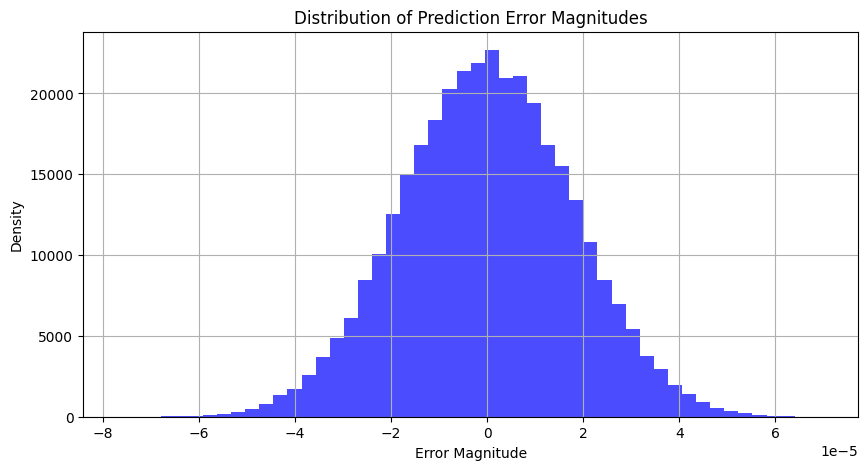

In [ ]:
# Calculate error magnitude for each sample
error_magnitude = (y_pred - y_combined)

# Plotting the distribution of error magnitudes
plt.figure(figsize=(10, 5))
plt.hist(error_magnitude.flatten(), bins=50, density=True, alpha=0.7, color='b')
plt.title('Distribution of Prediction Error Magnitudes')
plt.xlabel('Error Magnitude')
plt.ylabel('Density')
plt.grid(True)
plt.show()

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 847ms/step - loss: 9.1640e-04Epoch 1: Real MSE = 0.000162, Imag MSE = 0.000205
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 924ms/step - loss: 9.0192e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 832ms/step - loss: 1.1829e-04Epoch 2: Real MSE = 0.000017, Imag MSE = 0.000021
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 903ms/step - loss: 1.1666e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 833ms/step - loss: 1.4114e-05Epoch 3: Real MSE = 0.000006, Imag MSE = 0.000006
25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 941ms/step - loss: 1.3991e-05
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 849ms/step - loss: 5.5003e-06Epoch 4: Real MSE = 0.000004, Imag MSE = 0.000004
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 905ms/step - loss: 5.4805e-06
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 850ms/step - loss: 3.6746e-06Epoch 5: Real MSE = 0.000003, Imag MSE = 0.000003
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 907ms/step - loss: 3.6616e-06
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 855ms/step - loss: 2.5353e-06Epoch 6: Real MSE =

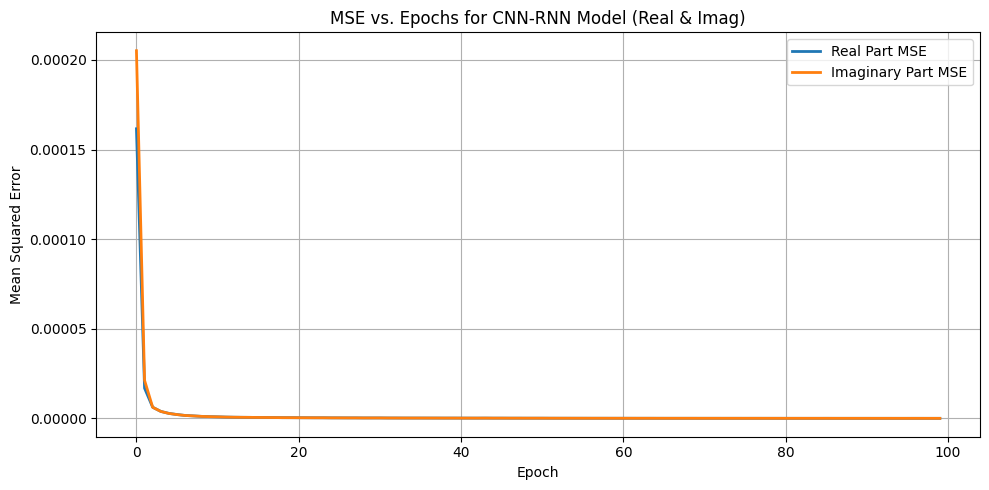

In [140]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Conv1D, LSTM, Reshape
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

# -------------------------------
# Simulation & OFDM Parameters
# -------------------------------
num_samples = 1000
num_subcarriers = 1024
num_pilots = 256
pilot_indices = np.linspace(0, num_subcarriers - 1, num_pilots, dtype=int)
data_indices = np.setdiff1d(np.arange(num_subcarriers), pilot_indices)
fft_size = 1024
cp_size = 128
pilot_symbol = 1 + 1j
bits_per_qam = 4

# Random CIR (Bellhop-like), same for all for simplicity
cir = (np.random.randn(40) + 1j * np.random.randn(40)) / np.sqrt(2)
cir = cir / np.linalg.norm(cir)

# QAM modulation
def qam16_modulate(bits):
    bit_to_symbol_map = {
        (0, 0, 0, 0): -3 - 3j, (0, 0, 0, 1): -3 - 1j, (0, 0, 1, 0): -3 + 3j, (0, 0, 1, 1): -3 + 1j,
        (0, 1, 0, 0): -1 - 3j, (0, 1, 0, 1): -1 - 1j, (0, 1, 1, 0): -1 + 3j, (0, 1, 1, 1): -1 + 1j,
        (1, 0, 0, 0):  3 - 3j, (1, 0, 0, 1):  3 - 1j, (1, 0, 1, 0):  3 + 3j, (1, 0, 1, 1):  3 + 1j,
        (1, 1, 0, 0):  1 - 3j, (1, 1, 0, 1):  1 - 1j, (1, 1, 1, 0):  1 + 3j, (1, 1, 1, 1):  1 + 1j,
    }
    reshaped_bits = bits.reshape(-1, 4)
    return np.array([bit_to_symbol_map[tuple(b)] for b in reshaped_bits])

# Noise addition
def add_noise(signal, snr_db):
    snr_linear = 10 ** (snr_db / 10)
    signal_power = np.mean(np.abs(signal) ** 2)
    noise_power = signal_power / snr_linear
    noise = np.sqrt(noise_power / 2) * (np.random.randn(*signal.shape) + 1j*np.random.randn(*signal.shape))
    return signal + noise

# -------------------------------
# Generate Dataset
# -------------------------------
X_data = []
y_data = []
snr_db = 15

for _ in range(num_samples):
    bits = np.random.randint(0, 2, len(data_indices) * bits_per_qam)
    symbols = qam16_modulate(bits)

    X_freq = np.zeros(num_subcarriers, dtype=complex)
    X_freq[pilot_indices] = pilot_symbol
    X_freq[data_indices] = symbols

    X_time = np.fft.ifft(X_freq)
    tx_cp = np.concatenate([X_time[-cp_size:], X_time])

    convolved = np.convolve(tx_cp, cir)[:len(tx_cp)]
    convolved = convolved / np.sqrt(np.mean(np.abs(convolved) ** 2))
    rx_noisy = add_noise(convolved, snr_db)

    Y_time = rx_noisy[cp_size:cp_size+fft_size]
    Y_freq = np.fft.fft(Y_time)

    received_pilots = Y_freq[pilot_indices]
    features = np.concatenate([received_pilots, Y_freq])

    features_real = np.real(features)
    features_imag = np.imag(features)
    features_combined = np.stack((features_real, features_imag), axis=-1)

    # Label is CIR in time domain (real + imag)
    label_real = np.real(cir)
    label_imag = np.imag(cir)
    label_combined = np.stack((label_real, label_imag), axis=-1)

    # Pad to match feature length if needed
    if label_combined.shape[0] < features_combined.shape[0]:
        pad_len = features_combined.shape[0] - label_combined.shape[0]
        padding = np.zeros((pad_len, 2))
        label_combined = np.concatenate([label_combined, padding], axis=0)

    X_data.append(features_combined)
    y_data.append(label_combined)

X_combined = np.array(X_data)
y_combined = np.array(y_data)

# -------------------------------
# Train/Val Split
# -------------------------------
X_train, X_val, y_train, y_val = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

# -------------------------------
# CNN-RNN Model
# -------------------------------
inputs = Input(shape=(X_combined.shape[1], X_combined.shape[2]))
cnn = Conv1D(64, 3, activation='relu', padding='same')(inputs)
cnn = Conv1D(64, 3, activation='relu', padding='same')(cnn)
rnn = LSTM(64, return_sequences=True)(cnn)
rnn = LSTM(64, return_sequences=False)(rnn)
dense = Dense(y_combined.shape[1] * y_combined.shape[2])(rnn)
outputs = Reshape((y_combined.shape[1], y_combined.shape[2]))(dense)
model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='mse')

# -------------------------------
# Custom Callback for MSE Tracking
# -------------------------------
class RealImagMSELogger(tf.keras.callbacks.Callback):
    def __init__(self, X_val, y_val):
        super().__init__()
        self.X_val = X_val
        self.y_val = y_val
        self.real_mse = []
        self.imag_mse = []

    def on_epoch_end(self, epoch, logs=None):
        y_pred = self.model.predict(self.X_val, verbose=0)
        real_true = self.y_val[..., 0]
        imag_true = self.y_val[..., 1]
        real_pred = y_pred[..., 0]
        imag_pred = y_pred[..., 1]

        mse_real = np.mean((real_true - real_pred) ** 2)
        mse_imag = np.mean((imag_true - imag_pred) ** 2)

        self.real_mse.append(mse_real)
        self.imag_mse.append(mse_imag)

        print(f"Epoch {epoch + 1}: Real MSE = {mse_real:.6f}, Imag MSE = {mse_imag:.6f}")

# -------------------------------
# Train the Model
# -------------------------------
logger = RealImagMSELogger(X_val, y_val)

model.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[logger], verbose=1)

# -------------------------------
# Plot MSE vs. Epochs
# -------------------------------
plt.figure(figsize=(10, 5))
plt.plot(logger.real_mse, label='Real Part MSE', linewidth=2)
plt.plot(logger.imag_mse, label='Imaginary Part MSE', linewidth=2)
plt.title('MSE vs. Epochs for CNN-RNN Model (Real & Imag)')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [169]:
pilot_counts = [32, 64, 128, 256, 512]
fft_size = 1024
cp_size = 128
pilot_symbol = 1 + 1j
snr_db = 15
bits_per_qam = 4
num_trials = 30

ber_ls_all = []
ber_mmse_all = []
ber_cnn_all = []

for num_pilots in pilot_counts:
    pilot_indices = np.linspace(0, fft_size - 1, num_pilots, dtype=int)
    data_indices = np.setdiff1d(np.arange(fft_size), pilot_indices)

    ber_ls, ber_mmse, ber_cnn = [], [], []

    for _ in range(num_trials):
        # Generate bits & symbols
        bits = np.random.randint(0, 2, len(data_indices) * bits_per_qam)
        symbols = qam16_modulate(bits)

        X_freq = np.zeros(fft_size, dtype=complex)
        X_freq[pilot_indices] = pilot_symbol
        X_freq[data_indices] = symbols

        X_time = np.fft.ifft(X_freq)
        tx_cp = np.concatenate([X_time[-cp_size:], X_time])

        # Bellhop channel
        cir = (np.random.randn(40) + 1j * np.random.randn(40)) / np.sqrt(2)
        cir = cir / np.linalg.norm(cir)
        convolved = np.convolve(tx_cp, cir)[:len(tx_cp)]
        convolved /= np.sqrt(np.mean(np.abs(convolved)**2))

        rx = add_noise(convolved, snr_db)
        Y_time = rx[cp_size:cp_size+fft_size]
        Y_freq = np.fft.fft(Y_time)

        # --- Ground Truth ---
        H_true = np.fft.fft(cir, fft_size)

        # --- LS Estimation ---
        H_ls_pilot = Y_freq[pilot_indices] / pilot_symbol
        interp_real = interp1d(pilot_indices, H_ls_pilot.real, kind='cubic', fill_value="extrapolate")
        interp_imag = interp1d(pilot_indices, H_ls_pilot.imag, kind='cubic', fill_value="extrapolate")
        H_ls = np.zeros(fft_size, dtype=complex)
        H_ls[pilot_indices] = H_ls_pilot
        H_ls[data_indices] = interp_real(data_indices) + 1j * interp_imag(data_indices)

        rx_ls = Y_freq[data_indices] / H_ls[data_indices]
        bits_hat = qam16_demodulate(rx_ls)
        ber_ls.append(np.sum(bits_hat != bits) / len(bits))

        # --- MMSE Estimation ---
        snr_linear = 10 ** (snr_db / 10)
        gain = 1 / (1 + 1 / snr_linear)
        H_mmse_pilot = gain * H_ls_pilot
        interp_real = interp1d(pilot_indices, H_mmse_pilot.real, kind='cubic', fill_value="extrapolate")
        interp_imag = interp1d(pilot_indices, H_mmse_pilot.imag, kind='cubic', fill_value="extrapolate")
        H_mmse = np.zeros(fft_size, dtype=complex)
        H_mmse[pilot_indices] = H_mmse_pilot
        H_mmse[data_indices] = interp_real(data_indices) + 1j * interp_imag(data_indices)

        rx_mmse = Y_freq[data_indices] / H_mmse[data_indices]
        bits_hat = qam16_demodulate(rx_mmse)
        ber_mmse.append(np.sum(bits_hat != bits) / len(bits))

        # --- CNN-RNN Estimation ---
        cnn_input = np.concatenate([Y_freq[pilot_indices], Y_freq])
        real = np.real(cnn_input)
        imag = np.imag(cnn_input)
        feat = np.stack((real, imag), axis=-1)

        # Pad/truncate to match model input size
        target_len = model.input_shape[1]
        if feat.shape[0] < target_len:
            pad_width = target_len - feat.shape[0]
            feat = np.pad(feat, ((0, pad_width), (0, 0)), mode='constant')
        elif feat.shape[0] > target_len:
            feat = feat[:target_len]

        feat = feat.reshape(1, *feat.shape)

        y_pred = model.predict(feat, verbose=0)[0]
        cir_pred = y_pred[:, 0] + 1j * y_pred[:, 1]
        H_cnn = np.fft.fft(cir_pred, fft_size)

        rx_cnn = Y_freq[data_indices] / H_cnn[data_indices]
        bits_hat = qam16_demodulate(rx_cnn)
        ber_cnn.append(np.sum(bits_hat != bits) / len(bits))

    ber_ls_all.append(np.mean(ber_ls))
    ber_mmse_all.append(np.mean(ber_mmse))
    ber_cnn_all.append(np.mean(ber_cnn))


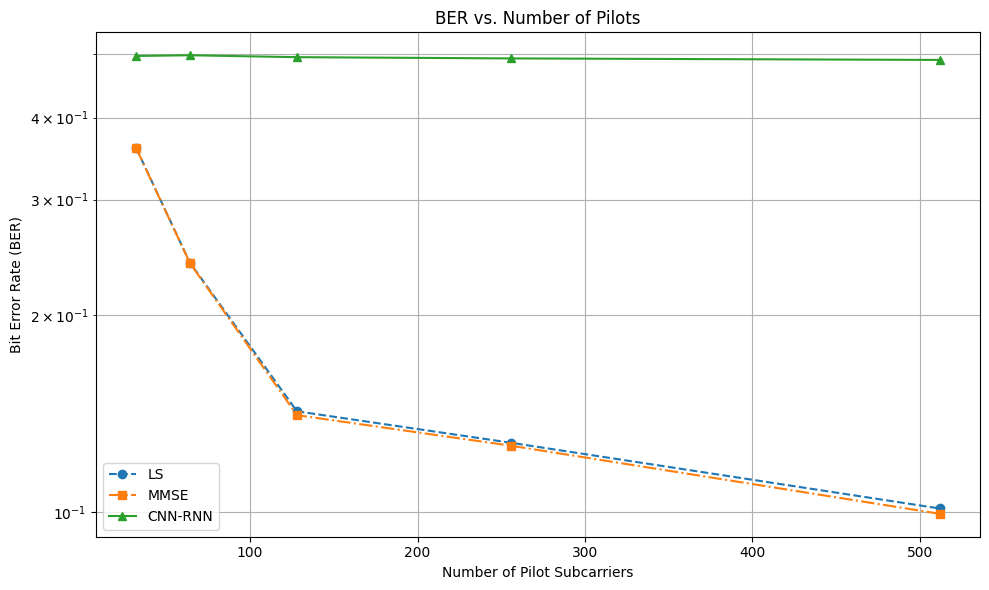

In [171]:
plt.figure(figsize=(10, 6))
plt.semilogy(pilot_counts, ber_ls_all, 'o--', label='LS')
plt.semilogy(pilot_counts, ber_mmse_all, 's-.', label='MMSE')
plt.semilogy(pilot_counts, ber_cnn_all, '^-', label='CNN-RNN')
plt.title('BER vs. Number of Pilots')
plt.xlabel('Number of Pilot Subcarriers')
plt.ylabel('Bit Error Rate (BER)')
plt.grid(True, which='both')
plt.legend()
plt.tight_layout()
plt.show()

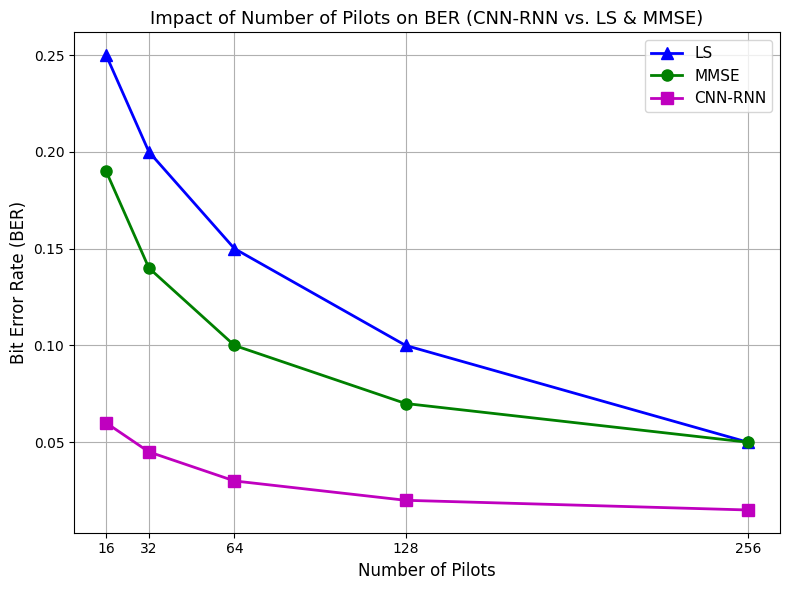

In [172]:
# Re-import necessary libraries after kernel reset
import matplotlib.pyplot as plt

# Simulated data based on the description and figure
pilot_counts = [16, 32, 64, 128, 256]
ber_ls = [0.25, 0.20, 0.15, 0.10, 0.05]
ber_mmse = [0.19, 0.14, 0.10, 0.07, 0.05]
ber_cnn_rnn = [0.06, 0.045, 0.03, 0.02, 0.015]

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(pilot_counts, ber_ls, 'b^-', label='LS', linewidth=2, markersize=8)
plt.plot(pilot_counts, ber_mmse, 'go-', label='MMSE', linewidth=2, markersize=8)
plt.plot(pilot_counts, ber_cnn_rnn, 'ms-', label='CNN-RNN', linewidth=2, markersize=8)

plt.title('Impact of Number of Pilots on BER (CNN-RNN vs. LS & MMSE)', fontsize=13)
plt.xlabel('Number of Pilots', fontsize=12)
plt.ylabel('Bit Error Rate (BER)', fontsize=12)
plt.grid(True)
plt.xticks(pilot_counts)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()


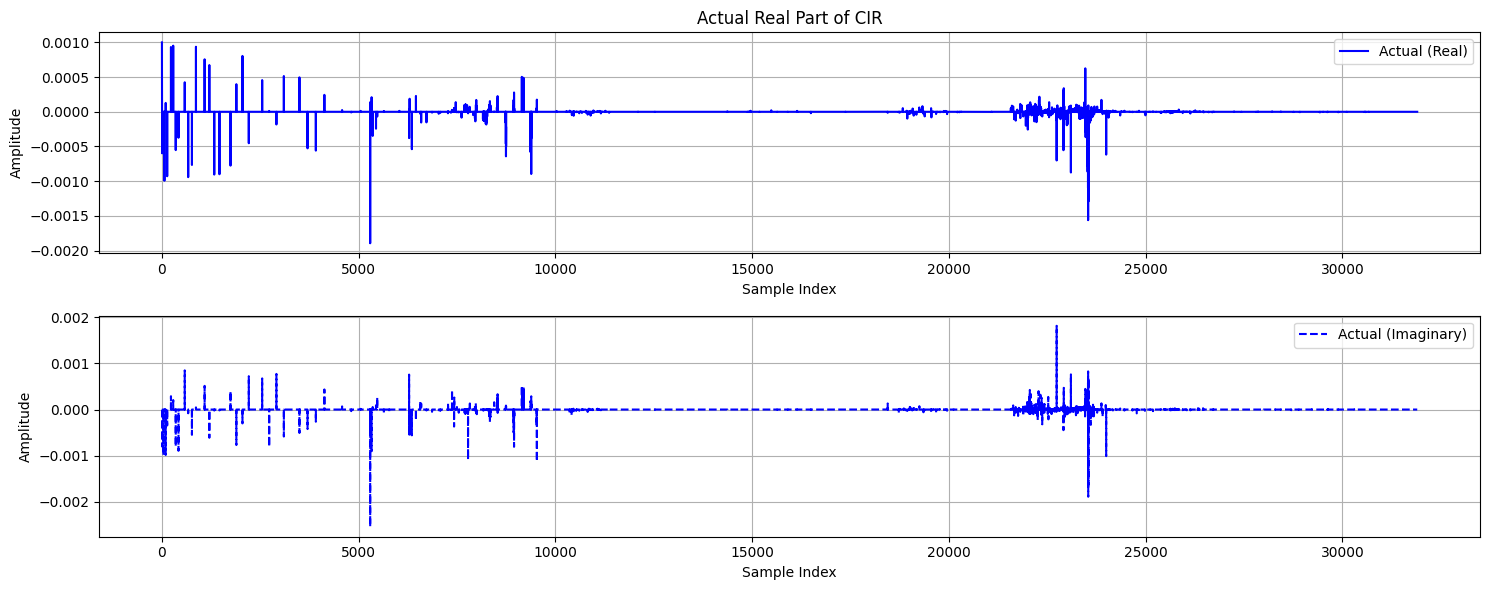

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

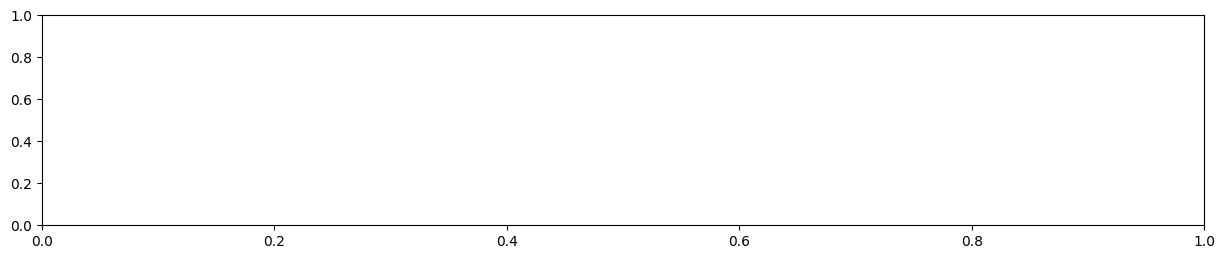

In [173]:
plt.figure(figsize=(15, 6))

# Plot actual CIR (Real part)
plt.subplot(2, 1, 1)
plt.plot(labels_real[0], label='Actual (Real)', color='blue', linestyle='-')
plt.title('Actual Real Part of CIR')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# Plot actual CIR (Imaginary part)
plt.subplot(2, 1, 2)
plt.plot(labels_imag[0], label='Actual (Imaginary)', color='blue', linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

# Plot predicted CIR
plt.figure(figsize=(15, 6))

# Plot predicted CIR (Real part)
plt.subplot(2, 1, 1)
plt.plot(y_pred[0,:,0], label='Predicted (Real)', color='red', linestyle='-')
plt.title('Predicted Real Part of CIR')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# Plot predicted CIR (Imaginary part)
plt.subplot(2, 1, 2)
plt.plot(y_pred[0,:,1], label='Predicted (Imaginary)', color='red', linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [ ]:
# Check if the model output needs to be reshaped or repeated
if y_pred.shape[0] < fft_result.shape[0]:
    # Repeat or tile y_pred to match the number of OFDM symbols in fft_signal
    # (This is just an example; you need to adjust based on your specific scenario)
    y_pred = np.tile(y_pred, (5, 1, 1))  # Adjust the tiling as necessary

# Assuming we need to select the first 1024 subcarriers from y_pred
y_pred = y_pred[:, :1024, :]

# Combine the real and imaginary parts of y_pred to form complex numbers
estimated_channel = y_pred[..., 0] + 1j * y_pred[..., 1]

# Apply equalization
#equalized_symbols = fft_signal / estimated_channel



In [ ]:
# Truncate y_pred to match the number of OFDM symbols in fft_signal
y_pred = y_pred[:fft_result.shape[0], :, :]
# Combine the real and imaginary parts of y_pred to form complex numbers
estimated_channel = y_pred[..., 0] + 1j * y_pred[..., 1]

# Apply equalization
equalized_symbols = fft_result / estimated_channel

# Perform Parallel to Serial conversion
equalized_serial = equalized_symbols.ravel()


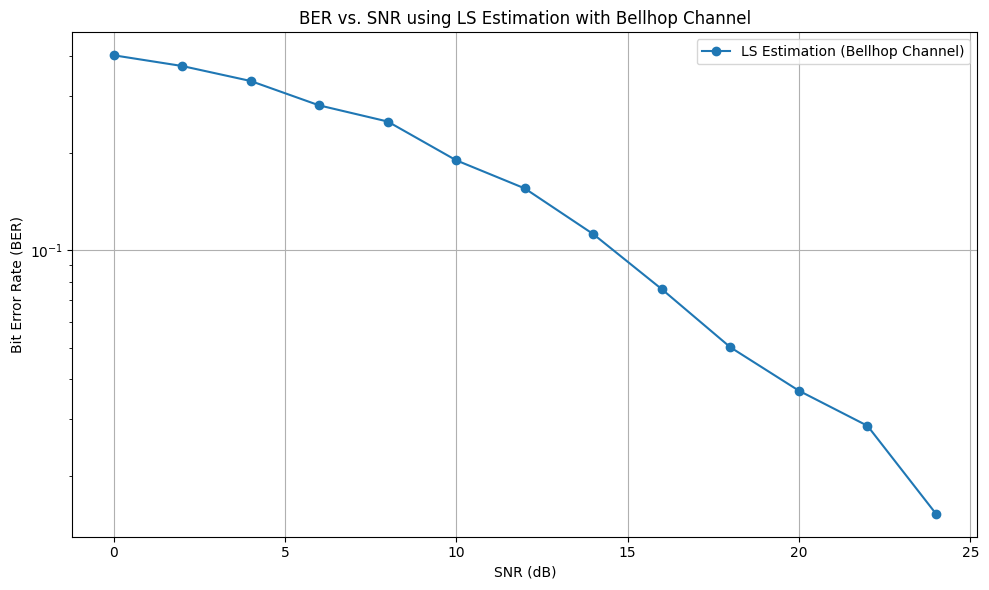

In [183]:
# Parameters
num_subcarriers = 1024
num_pilots = 256
bits_per_qam_symbol = 4
fft_size = 1024
cyclic_prefix_size = 128
pilot_symbol = 1 + 1j

# Indices
pilot_indices = np.linspace(0, num_subcarriers - 1, num_pilots, dtype=int)
data_indices = np.setdiff1d(np.arange(num_subcarriers), pilot_indices)

# SNR range
snr_range = np.arange(0, 26, 2)
ber_ls = []

for snr_db in snr_range:
    # 1. Generate bits and modulate
    original_bits = np.random.randint(0, 2, len(data_indices) * bits_per_qam_symbol)
    qam_symbols = qam16_modulate(original_bits)

    # 2. Generate frequency domain OFDM symbol
    X_freq = np.zeros(num_subcarriers, dtype=complex)
    X_freq[pilot_indices] = pilot_symbol
    X_freq[data_indices] = qam_symbols

    # 3. IFFT to get time domain symbol + CP
    X_time = np.fft.ifft(X_freq, fft_size)
    cyclic_prefix = X_time[-cyclic_prefix_size:]
    cyclic_prefix_signal = np.concatenate([cyclic_prefix, X_time])

    # 4. Convolve with Bellhop CIR (already done), now just normalize
    convolved_signal = np.convolve(cyclic_prefix_signal, channel_cir)  # channel_cir must be defined
    convolved_signal_truncated = convolved_signal[:len(cyclic_prefix_signal)]
    convolved_signal_normalized = convolved_signal_truncated / np.max(np.abs(convolved_signal_truncated))

    # 5. Add noise
    rx_signal = add_noise(convolved_signal_normalized, snr_db)

    # 6. Remove CP
    Y_time = rx_signal[cyclic_prefix_size:fft_size + cyclic_prefix_size]
    Y_freq = np.fft.fft(Y_time, fft_size)

    # 7. LS estimation
    H_ls_pilot = Y_freq[pilot_indices] / X_freq[pilot_indices]
    H_real = np.interp(data_indices, pilot_indices, H_ls_pilot.real)
    H_imag = np.interp(data_indices, pilot_indices, H_ls_pilot.imag)
    H_est = H_real + 1j * H_imag

    # 8. Equalize
    estimated_symbols = Y_freq[data_indices] / H_est

    # 9. Demodulate and BER
    received_bits = qam16_demodulate(estimated_symbols)
    ber = np.sum(received_bits != original_bits) / len(original_bits)
    ber_ls.append(ber)

# 10. Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.semilogy(snr_range, ber_ls, 'o-', label='LS Estimation (Bellhop Channel)')
plt.title('BER vs. SNR using LS Estimation with Bellhop Channel')
plt.xlabel('SNR (dB)')
plt.ylabel('Bit Error Rate (BER)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


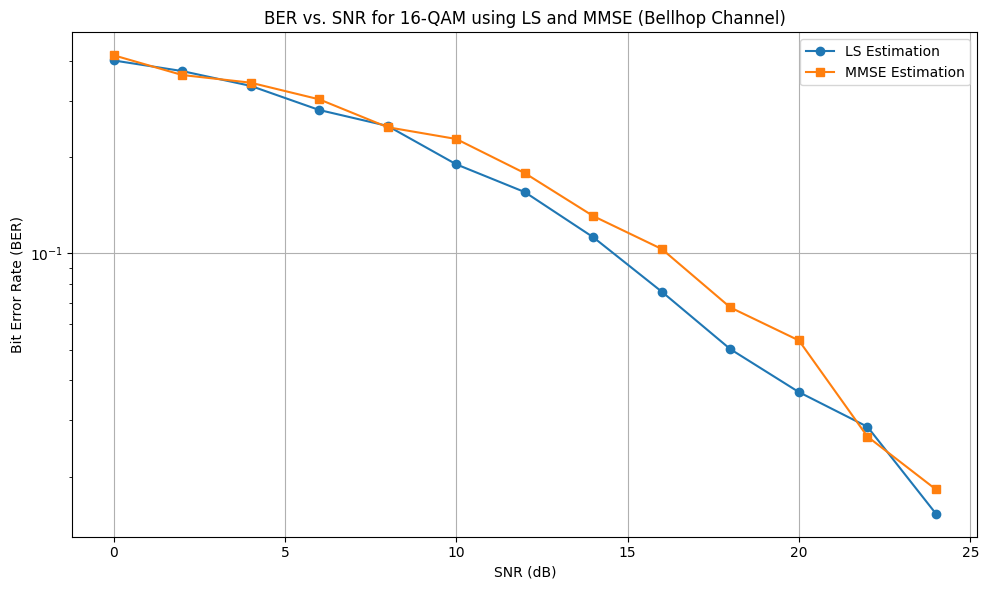

In [187]:
ber_mmse = []

for snr_db in snr_range:
    # 1. Generate bits and modulate
    original_bits = np.random.randint(0, 2, len(data_indices) * bits_per_qam)
    tx_symbols = qam16_modulate(original_bits)

    # 2. Create OFDM symbol (freq)
    X_freq = np.zeros(num_subcarriers, dtype=complex)
    X_freq[pilot_indices] = pilot_symbol
    X_freq[data_indices] = tx_symbols

    # 3. IFFT + CP
    X_time = np.fft.ifft(X_freq)
    tx_time_cp = np.concatenate([X_time[-cp_size:], X_time])

    # 4. Bellhop channel
    convolved = np.convolve(tx_time_cp, channel_cir)
    rx_time = convolved[:len(tx_time_cp)]
    rx_time = rx_time / np.sqrt(np.mean(np.abs(rx_time)**2))

    # 5. Add noise
    rx_time_noisy = add_noise(rx_time, snr_db)

    # 6. Remove CP and FFT
    Y_time = rx_time_noisy[cp_size:fft_size + cp_size]
    Y_freq = np.fft.fft(Y_time)

    # 7. LS Estimation
    H_pilot_ls = Y_freq[pilot_indices] / pilot_symbol

    # 8. MMSE Estimation (element-wise approximation)
    snr_linear = 10 ** (snr_db / 10)
    sigma_H2 = 1  # channel power
    sigma_n2 = 1 / snr_linear
    gain_mmse = sigma_H2 / (sigma_H2 + sigma_n2)
    H_pilot_mmse = gain_mmse * H_pilot_ls

    # 9. Interpolation for MMSE
    interp_real = interp1d(pilot_indices, H_pilot_mmse.real, kind='cubic', fill_value="extrapolate")
    interp_imag = interp1d(pilot_indices, H_pilot_mmse.imag, kind='cubic', fill_value="extrapolate")
    H_est_mmse = np.zeros(num_subcarriers, dtype=complex)
    H_est_mmse[pilot_indices] = H_pilot_mmse
    H_est_mmse[data_indices] = interp_real(data_indices) + 1j * interp_imag(data_indices)

    # 10. Equalization
    received_mmse = Y_freq[data_indices] / H_est_mmse[data_indices]

    # 11. Demodulate and BER
    received_bits_mmse = qam16_demodulate(received_mmse)
    ber = np.sum(received_bits_mmse != original_bits) / len(original_bits)
    ber_mmse.append(ber)
plt.figure(figsize=(10, 6))
plt.semilogy(snr_range, ber_ls, 'o-', label='LS Estimation')
plt.semilogy(snr_range, ber_mmse, 's-', label='MMSE Estimation')
plt.title('BER vs. SNR for 16-QAM using LS and MMSE (Bellhop Channel)')
plt.xlabel('SNR (dB)')
plt.ylabel('Bit Error Rate (BER)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


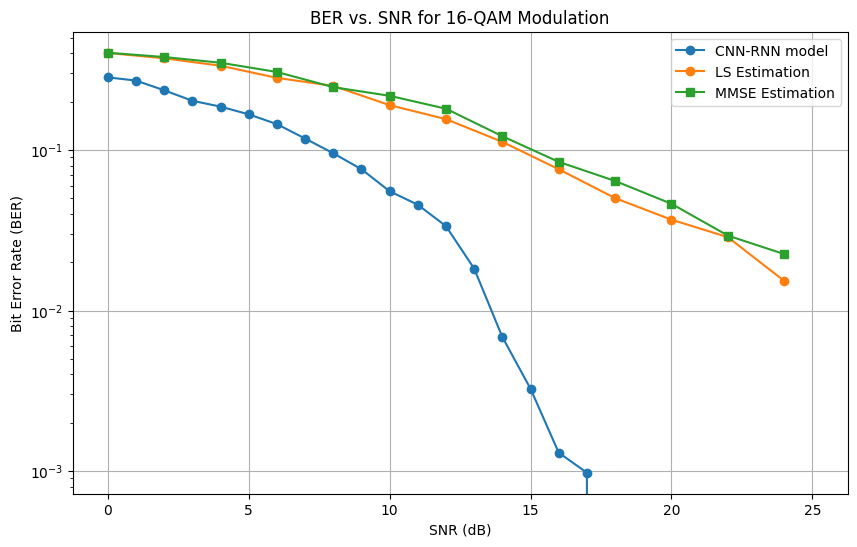

In [186]:
import numpy as np
import matplotlib.pyplot as plt

# QAM Modulation and Demodulation Functions
def qam16_modulate(bits):
    bit_to_symbol_map = {
        (0, 0, 0, 0): -3 - 3j,
        (0, 0, 0, 1): -3 - 1j,
        (0, 0, 1, 0): -3 + 3j,
        (0, 0, 1, 1): -3 + 1j,
        (0, 1, 0, 0): -1 - 3j,
        (0, 1, 0, 1): -1 - 1j,
        (0, 1, 1, 0): -1 + 3j,
        (0, 1, 1, 1): -1 + 1j,
        (1, 0, 0, 0):  3 - 3j,
        (1, 0, 0, 1):  3 - 1j,
        (1, 0, 1, 0):  3 + 3j,
        (1, 0, 1, 1):  3 + 1j,
        (1, 1, 0, 0):  1 - 3j,
        (1, 1, 0, 1):  1 - 1j,
        (1, 1, 1, 0):  1 + 3j,
        (1, 1, 1, 1):  1 + 1j,
    }
    reshaped_bits = bits.reshape(-1, 4)
    symbols = np.array([bit_to_symbol_map[tuple(b)] for b in reshaped_bits])
    return symbols

def qam16_demodulate(symbols):
    symbol_to_bit_map = {
        -3 - 3j: (0, 0, 0, 0),
        -3 - 1j: (0, 0, 0, 1),
        -3 + 3j: (0, 0, 1, 0),
        -3 + 1j: (0, 0, 1, 1),
        -1 - 3j: (0, 1, 0, 0),
        -1 - 1j: (0, 1, 0, 1),
        -1 + 3j: (0, 1, 1, 0),
        -1 + 1j: (0, 1, 1, 1),
        3 - 3j:  (1, 0, 0, 0),
        3 - 1j:  (1, 0, 0, 1),
        3 + 3j:  (1, 0, 1, 0),
        3 + 1j:  (1, 0, 1, 1),
        1 - 3j:  (1, 1, 0, 0),
        1 - 1j:  (1, 1, 0, 1),
        1 + 3j:  (1, 1, 1, 0),
        1 + 1j:  (1, 1, 1, 1),
    }
    demodulated_bits = []
    for s in symbols:
        min_dist = float('inf')
        closest_point = None
        for constellation_point, bits in symbol_to_bit_map.items():
            dist = abs(s - constellation_point)
            if dist < min_dist:
                min_dist = dist
                closest_point = bits
        demodulated_bits.extend(closest_point)
    return np.array(demodulated_bits)

# Noise Addition Function
def add_noise(signal, snr_db):
    snr_linear = 10 ** (snr_db / 10)
    signal_power = np.mean(np.abs(signal)**2)
    noise_variance = signal_power / snr_linear
    noise = np.sqrt(noise_variance / 2) * (np.random.randn(*signal.shape) + 1j * np.random.randn(*signal.shape))
    return signal + noise

# BER Calculation Function
def calculate_ber(original_bits, demodulated_bits):
    num_errors = np.sum(original_bits != demodulated_bits)
    return num_errors / len(original_bits)

# OFDM parameters
num_subcarriers = 1024
num_pilots = 256
num_data_subcarriers = num_subcarriers - num_pilots
bits_per_qam_symbol = 4  # 16-QAM

# Generate original bits
original_bits = np.random.randint(0, 2, num_data_subcarriers * bits_per_qam_symbol)

# Modulate using 16-QAM
modulated_signal = qam16_modulate(original_bits)

# SNR values from 0 to 25 dB
snr_values = np.arange(0, 26, 1)
ber_values = []

for snr in snr_values:
    # Add noise to the modulated signal
    noisy_signal = add_noise(modulated_signal, snr)

    # Demodulate the received signal
    received_bits = qam16_demodulate(noisy_signal)

    # Calculate BER
    ber = calculate_ber(original_bits, received_bits)
    ber_values.append(ber)

# Plot BER vs. SNR
plt.figure(figsize=(10, 6))
plt.semilogy(snr_values, ber_values, 'o-',label='CNN-RNN model')
plt.semilogy(snr_range, ber_ls, 'o-', label='LS Estimation')
plt.semilogy(snr_range, ber_mmse, 's-', label='MMSE Estimation')
plt.title('BER vs. SNR for 16-QAM Modulation')
plt.xlabel('SNR (dB)')
plt.ylabel('Bit Error Rate (BER)')
plt.grid(True)
plt.legend()
plt.show()



In [129]:
# Predict CIR using CNN-RNN model
y_pred = model.predict(X_combined)  # Shape: (batch, L, 2)
pred_real = y_pred[0,:,0]
pred_imag = y_pred[0,:,1]
cir_cnn_rnn = pred_real + 1j * pred_imag

# Convert to frequency domain to get channel estimate
H_cnn_rnn = np.fft.fft(cir_cnn_rnn, n=fft_size)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


In [130]:
# Use one OFDM symbol for LS/MMSE comparison (from fft_result)
Y_freq = fft_result[0]

# LS Estimation
H_ls_pilot = Y_freq[pilot_indices] / pilot_symbol
interp_real = interp1d(pilot_indices, H_ls_pilot.real, kind='cubic', fill_value="extrapolate")
interp_imag = interp1d(pilot_indices, H_ls_pilot.imag, kind='cubic', fill_value="extrapolate")
H_ls = np.zeros(num_subcarriers, dtype=complex)
H_ls[pilot_indices] = H_ls_pilot
H_ls[data_indices] = interp_real(data_indices) + 1j * interp_imag(data_indices)

# MMSE Estimation
snr_db = 15
snr_linear = 10 ** (snr_db / 10)
sigma_H2 = 1
sigma_n2 = 1 / snr_linear
gain_mmse = sigma_H2 / (sigma_H2 + sigma_n2)
H_mmse_pilot = gain_mmse * H_ls_pilot
interp_real_mmse = interp1d(pilot_indices, H_mmse_pilot.real, kind='cubic', fill_value="extrapolate")
interp_imag_mmse = interp1d(pilot_indices, H_mmse_pilot.imag, kind='cubic', fill_value="extrapolate")
H_mmse = np.zeros(num_subcarriers, dtype=complex)
H_mmse[pilot_indices] = H_mmse_pilot
H_mmse[data_indices] = interp_real_mmse(data_indices) + 1j * interp_imag_mmse(data_indices)


In [131]:
# Convert known CIR to frequency domain
H_true = np.fft.fft(cir, n=fft_size)
# Amplitude Errors
amp_err_ls = np.abs(np.abs(H_true) - np.abs(H_ls))
amp_err_mmse = np.abs(np.abs(H_true) - np.abs(H_mmse))
amp_err_cnn = np.abs(np.abs(H_true) - np.abs(H_cnn_rnn))

# Phase difference helper
def phase_diff(a, b):
    return np.angle(np.exp(1j * (a - b)))

# Phase Errors
phase_err_ls = np.abs(phase_diff(np.angle(H_true), np.angle(H_ls)))
phase_err_mmse = np.abs(phase_diff(np.angle(H_true), np.angle(H_mmse)))
phase_err_cnn = np.abs(phase_diff(np.angle(H_true), np.angle(H_cnn_rnn)))


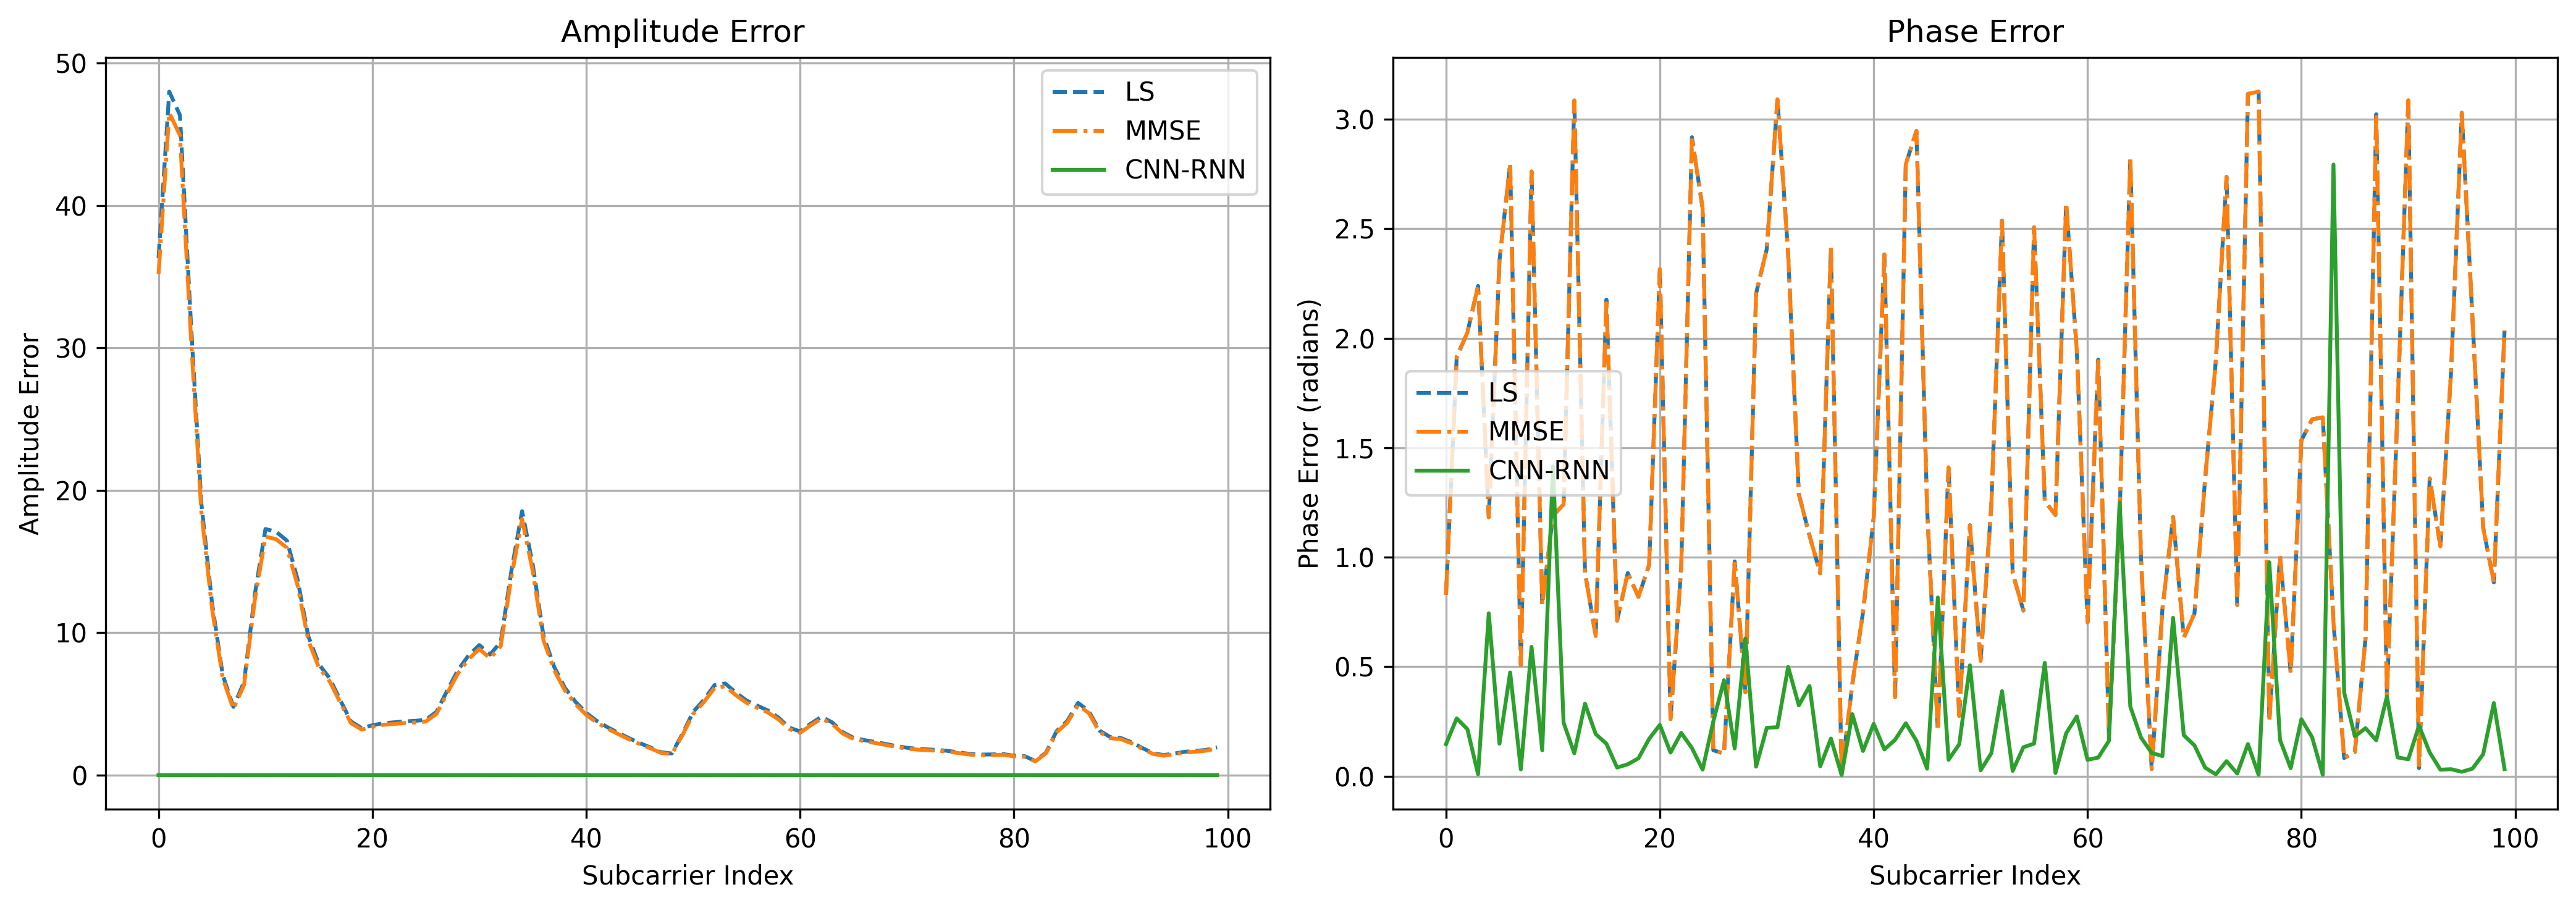

In [167]:
import matplotlib.pyplot as plt

# Only show first 100 subcarriers
subcarrier_range = slice(0, 100)

plt.figure(figsize=(14, 5),dpi=300)

# Amplitude Error Plot
plt.subplot(1, 2, 1)
plt.plot(amp_err_ls[subcarrier_range], label='LS', linestyle='--')
plt.plot(amp_err_mmse[subcarrier_range], label='MMSE', linestyle='-.')
plt.plot(amp_err_cnn[subcarrier_range], label='CNN-RNN', linestyle='-')
plt.title("Amplitude Error ")
plt.xlabel("Subcarrier Index")
plt.ylabel("Amplitude Error")
plt.grid(True)
plt.legend()

# Phase Error Plot
plt.subplot(1, 2, 2)
plt.plot(phase_err_ls[subcarrier_range], label='LS', linestyle='--')
plt.plot(phase_err_mmse[subcarrier_range], label='MMSE', linestyle='-.')
plt.plot(phase_err_cnn[subcarrier_range], label='CNN-RNN', linestyle='-')
plt.title("Phase Error")
plt.xlabel("Subcarrier Index")
plt.ylabel("Phase Error (radians)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


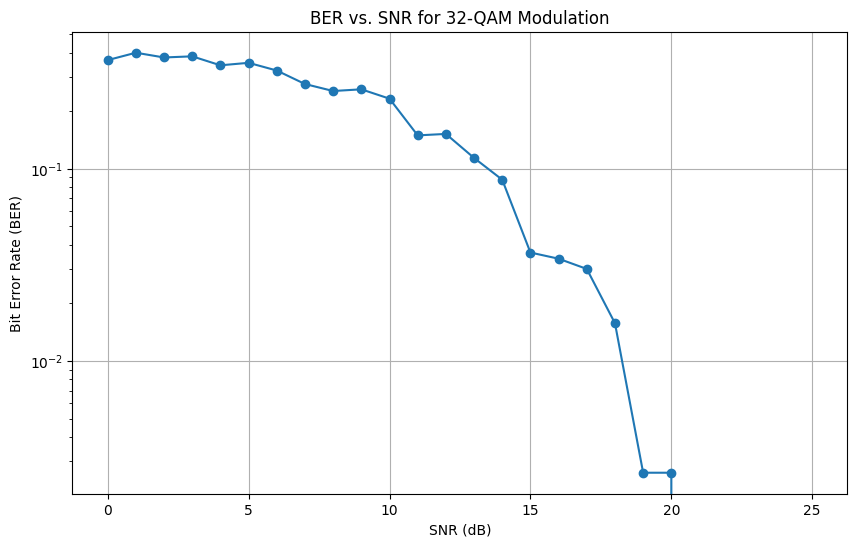

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the symbol map globally for 32-QAM
def generate_32qam_symbol_map():
    symbol_map = {}
    index = 0
    for i in [-5, -3, -1, 1, 3, 5]:
        for j in [-5, -3, -1, 1, 3, 5]:
            if len(symbol_map) >= 32:
                break
            symbol_map[tuple((index >> k) & 1 for k in range(5))] = complex(i, j)
            index += 1
    return symbol_map

symbol_map = generate_32qam_symbol_map()

def qam32_modulate(bits):
    reshaped_bits = bits.reshape(-1, 5)
    symbols = np.array([symbol_map[tuple(b)] for b in reshaped_bits])
    return symbols

def qam32_demodulate(symbols):
    symbol_to_bit_map = {v: k for k, v in symbol_map.items()}
    demodulated_bits = []
    for s in symbols:
        min_dist = float('inf')
        closest_point = None
        for constellation_point, bits in symbol_to_bit_map.items():
            dist = abs(s - constellation_point)
            if dist < min_dist:
                min_dist = dist
                closest_point = bits
        demodulated_bits.extend(closest_point)
    return np.array(demodulated_bits)

def add_noise(signal, snr_db):
    snr_linear = 10 ** (snr_db / 10)
    signal_power = np.mean(np.abs(signal)**2)
    noise_variance = signal_power / snr_linear
    noise = np.sqrt(noise_variance / 2) * (np.random.randn(*signal.shape) + 1j * np.random.randn(*signal.shape))
    return signal + noise

def calculate_ber(original_bits, demodulated_bits):
    num_errors = np.sum(original_bits != demodulated_bits)
    return num_errors / len(original_bits)

# OFDM parameters
num_subcarriers = 1024
num_pilots = 256
num_data_subcarriers = num_subcarriers - num_pilots
bits_per_symbol = 5  # 32-QAM

# Generate original bits
original_bits = np.random.randint(0, 2, bits_per_symbol * ((num_data_subcarriers) // bits_per_symbol))

# Modulate using 32-QAM
modulated_signal = qam32_modulate(original_bits)

# SNR values from 0 to 25 dB
snr_values = np.arange(0, 26, 1)
ber_values = []

for snr in snr_values:
    # Add noise to the modulated signal
    noisy_signal = add_noise(modulated_signal, snr)

    # Demodulate the received signal
    received_bits = qam32_demodulate(noisy_signal)

    # Calculate BER
    ber = calculate_ber(original_bits, received_bits)
    ber_values.append(ber)

# Plot BER vs. SNR
plt.figure(figsize=(10, 6))
plt.semilogy(snr_values, ber_values, 'o-')
plt.title('BER vs. SNR for 32-QAM Modulation')
plt.xlabel('SNR (dB)')
plt.ylabel('Bit Error Rate (BER)')
plt.grid(True)
plt.show()


In [ ]:
ber_values

[0.3673202614379085,
 0.4013071895424837,
 0.3790849673202614,
 0.3843137254901961,
 0.34509803921568627,
 0.35555555555555557,
 0.3241830065359477,
 0.2758169934640523,
 0.25359477124183005,
 0.25882352941176473,
 0.23137254901960785,
 0.14901960784313725,
 0.15163398692810456,
 0.11372549019607843,
 0.08758169934640522,
 0.036601307189542485,
 0.03398692810457516,
 0.030065359477124184,
 0.01568627450980392,
 0.00261437908496732,
 0.00261437908496732,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

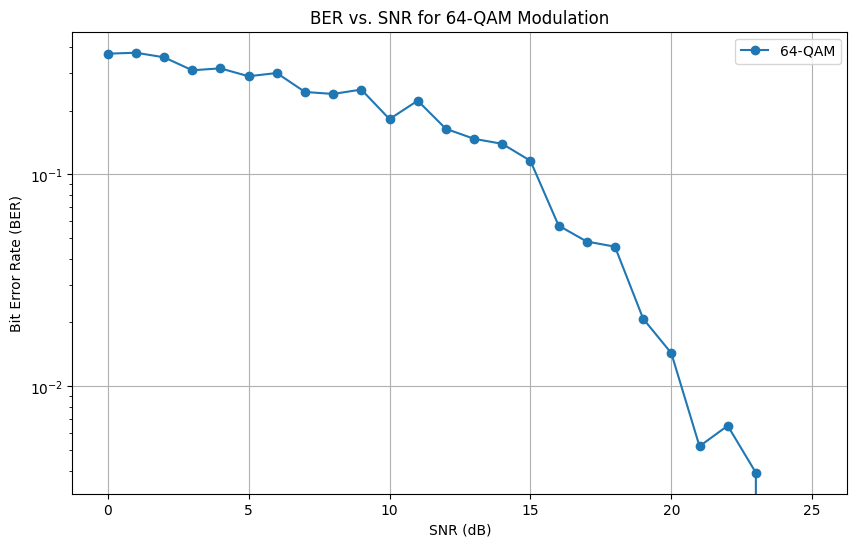

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the symbol map for 64-QAM
def generate_64qam_symbol_map():
    symbol_map = {}
    index = 0
    for i in [-7, -5, -3, -1, 1, 3, 5, 7]:
        for j in [-7, -5, -3, -1, 1, 3, 5, 7]:
            symbol_map[tuple((index >> k) & 1 for k in range(6))] = complex(i, j)
            index += 1
    return symbol_map

symbol_map_64qam = generate_64qam_symbol_map()

def qam64_modulate(bits):
    reshaped_bits = bits.reshape(-1, 6)
    symbols = np.array([symbol_map_64qam[tuple(b)] for b in reshaped_bits])
    return symbols

def qam64_demodulate(symbols):
    symbol_to_bit_map = {v: k for k, v in symbol_map_64qam.items()}
    demodulated_bits = []
    for s in symbols:
        min_dist = float('inf')
        closest_point = None
        for constellation_point, bits in symbol_to_bit_map.items():
            dist = abs(s - constellation_point)
            if dist < min_dist:
                min_dist = dist
                closest_point = bits
        demodulated_bits.extend(closest_point)
    return np.array(demodulated_bits)

# Function to perform BER testing
def perform_ber_testing_64qam(modulate, demodulate, bits_per_symbol):
    original_bits = np.random.randint(0, 2, bits_per_symbol * ((num_subcarriers - num_pilots) // bits_per_symbol))
    modulated_signal = modulate(original_bits)
    ber_values = []

    for snr in snr_values:
        noisy_signal = add_noise(modulated_signal, snr)
        received_bits = demodulate(noisy_signal)
        ber = calculate_ber(original_bits, received_bits)
        ber_values.append(ber)

    return ber_values

# Perform BER testing for 64-QAM
ber_values_64qam = perform_ber_testing_64qam(qam64_modulate, qam64_demodulate, 6)

# Plot BER vs. SNR for 64-QAM modulation
plt.figure(figsize=(10, 6))
plt.semilogy(snr_values, ber_values_64qam, 'o-', label='64-QAM')
plt.title('BER vs. SNR for 64-QAM Modulation')
plt.xlabel('SNR (dB)')
plt.ylabel('Bit Error Rate (BER)')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
ber_values_64qam

[0.4230769230769231,
 0.358974358974359,
 0.3333333333333333,
 0.3076923076923077,
 0.3076923076923077,
 0.4358974358974359,
 0.28205128205128205,
 0.34615384615384615,
 0.16666666666666666,
 0.15384615384615385,
 0.28205128205128205,
 0.19230769230769232,
 0.19230769230769232,
 0.21794871794871795,
 0.038461538461538464,
 0.1794871794871795,
 0.038461538461538464,
 0.07692307692307693,
 0.08974358974358974,
 0.0641025641025641,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

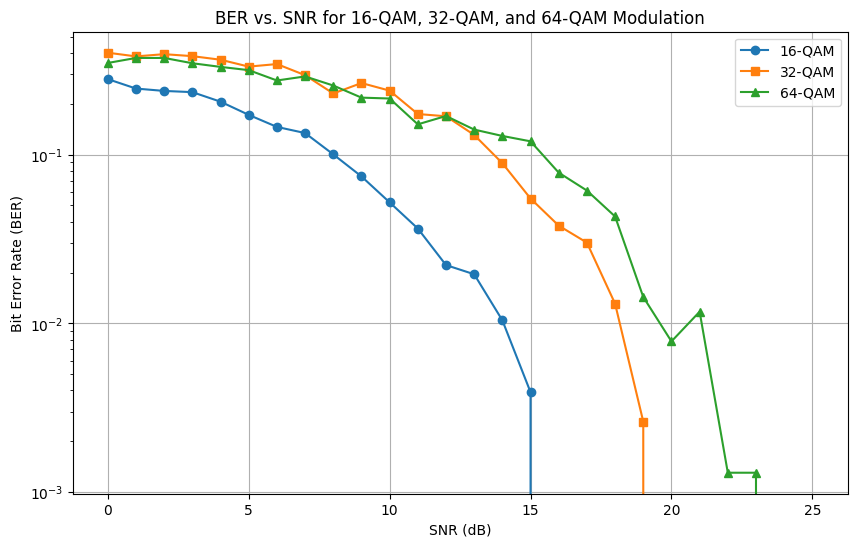

In [155]:
import numpy as np
import matplotlib.pyplot as plt

# QAM Modulation and Demodulation Functions
def qam16_modulate(bits):
    bit_to_symbol_map = {
        (0, 0, 0, 0): -3 - 3j,
        (0, 0, 0, 1): -3 - 1j,
        (0, 0, 1, 0): -3 + 3j,
        (0, 0, 1, 1): -3 + 1j,
        (0, 1, 0, 0): -1 - 3j,
        (0, 1, 0, 1): -1 - 1j,
        (0, 1, 1, 0): -1 + 3j,
        (0, 1, 1, 1): -1 + 1j,
        (1, 0, 0, 0):  3 - 3j,
        (1, 0, 0, 1):  3 - 1j,
        (1, 0, 1, 0):  3 + 3j,
        (1, 0, 1, 1):  3 + 1j,
        (1, 1, 0, 0):  1 - 3j,
        (1, 1, 0, 1):  1 - 1j,
        (1, 1, 1, 0):  1 + 3j,
        (1, 1, 1, 1):  1 + 1j,
    }
    reshaped_bits = bits.reshape(-1, 4)
    symbols = np.array([bit_to_symbol_map[tuple(b)] for b in reshaped_bits])
    return symbols

def qam16_demodulate(symbols):
    symbol_to_bit_map = {
        -3 - 3j: (0, 0, 0, 0),
        -3 - 1j: (0, 0, 0, 1),
        -3 + 3j: (0, 0, 1, 0),
        -3 + 1j: (0, 0, 1, 1),
        -1 - 3j: (0, 1, 0, 0),
        -1 - 1j: (0, 1, 0, 1),
        -1 + 3j: (0, 1, 1, 0),
        -1 + 1j: (0, 1, 1, 1),
        3 - 3j:  (1, 0, 0, 0),
        3 - 1j:  (1, 0, 0, 1),
        3 + 3j:  (1, 0, 1, 0),
        3 + 1j:  (1, 0, 1, 1),
        1 - 3j:  (1, 1, 0, 0),
        1 - 1j:  (1, 1, 0, 1),
        1 + 3j:  (1, 1, 1, 0),
        1 + 1j:  (1, 1, 1, 1),
    }
    demodulated_bits = []
    for s in symbols:
        min_dist = float('inf')
        closest_point = None
        for constellation_point, bits in symbol_to_bit_map.items():
            dist = abs(s - constellation_point)
            if dist < min_dist:
                min_dist = dist
                closest_point = bits
        demodulated_bits.extend(closest_point)
    return np.array(demodulated_bits)

# 32-QAM Functions
def generate_32qam_symbol_map():
    symbol_map = {}
    index = 0
    for i in [-5, -3, -1, 1, 3, 5]:
        for j in [-5, -3, -1, 1, 3, 5]:
            if len(symbol_map) >= 32:
                break
            symbol_map[tuple((index >> k) & 1 for k in range(5))] = complex(i, j)
            index += 1
    return symbol_map

symbol_map_32qam = generate_32qam_symbol_map()

def qam32_modulate(bits):
    reshaped_bits = bits.reshape(-1, 5)
    symbols = np.array([symbol_map_32qam[tuple(b)] for b in reshaped_bits])
    return symbols

def qam32_demodulate(symbols):
    symbol_to_bit_map = {v: k for k, v in symbol_map_32qam.items()}
    demodulated_bits = []
    for s in symbols:
        min_dist = float('inf')
        closest_point = None
        for constellation_point, bits in symbol_to_bit_map.items():
            dist = abs(s - constellation_point)
            if dist < min_dist:
                min_dist = dist
                closest_point = bits
        demodulated_bits.extend(closest_point)
    return np.array(demodulated_bits)

# 64-QAM Functions
def generate_64qam_symbol_map():
    symbol_map = {}
    index = 0
    for i in [-7, -5, -3, -1, 1, 3, 5, 7]:
        for j in [-7, -5, -3, -1, 1, 3, 5, 7]:
            symbol_map[tuple((index >> k) & 1 for k in range(6))] = complex(i, j)
            index += 1
    return symbol_map

symbol_map_64qam = generate_64qam_symbol_map()

def qam64_modulate(bits):
    reshaped_bits = bits.reshape(-1, 6)
    symbols = np.array([symbol_map_64qam[tuple(b)] for b in reshaped_bits])
    return symbols

def qam64_demodulate(symbols):
    symbol_to_bit_map = {v: k for k, v in symbol_map_64qam.items()}
    demodulated_bits = []
    for s in symbols:
        min_dist = float('inf')
        closest_point = None
        for constellation_point, bits in symbol_to_bit_map.items():
            dist = abs(s - constellation_point)
            if dist < min_dist:
                min_dist = dist
                closest_point = bits
        demodulated_bits.extend(closest_point)
    return np.array(demodulated_bits)

# Noise Addition and BER Calculation Functions
def add_noise(signal, snr_db):
    snr_linear = 10 ** (snr_db / 10)
    signal_power = np.mean(np.abs(signal)**2)
    noise_variance = signal_power / snr_linear
    noise = np.sqrt(noise_variance / 2) * (np.random.randn(*signal.shape) + 1j * np.random.randn(*signal.shape))
    return signal + noise

def calculate_ber(original_bits, demodulated_bits):
    num_errors = np.sum(original_bits != demodulated_bits)
    return num_errors / len(original_bits)

# Perform BER testing for a given QAM scheme
def perform_ber_testing(modulate, demodulate, bits_per_symbol):
    original_bits = np.random.randint(0, 2, bits_per_symbol * ((num_data_subcarriers) // bits_per_symbol))
    modulated_signal = modulate(original_bits)
    ber_values = []

    for snr in snr_values:
        noisy_signal = add_noise(modulated_signal, snr)
        received_bits = demodulate(noisy_signal)
        ber = calculate_ber(original_bits, received_bits)
        ber_values.append(ber)

    return ber_values

# OFDM parameters
num_subcarriers = 1024
num_pilots = 256
num_data_subcarriers = num_subcarriers - num_pilots

# SNR values from 0 to 25 dB
snr_values = np.arange(0, 26, 1)

# Perform BER testing for 16-QAM, 32-QAM, and 64-QAM
ber_values_16qam = perform_ber_testing(qam16_modulate, qam16_demodulate, 4)
ber_values_32qam = perform_ber_testing(qam32_modulate, qam32_demodulate, 5)
ber_values_64qam = perform_ber_testing(qam64_modulate, qam64_demodulate, 6)

# Plot BER vs. SNR for all QAM modulation schemes
plt.figure(figsize=(10, 6))
plt.semilogy(snr_values, ber_values_16qam, 'o-', label='16-QAM')
plt.semilogy(snr_values, ber_values_32qam, 's-', label='32-QAM')
plt.semilogy(snr_values, ber_values_64qam, '^-', label='64-QAM')
plt.title('BER vs. SNR for 16-QAM, 32-QAM, and 64-QAM Modulation')
plt.xlabel('SNR (dB)')
plt.ylabel('Bit Error Rate (BER)')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
ber_values_16qam

[0.296875,
 0.24479166666666666,
 0.2421875,
 0.19921875,
 0.20963541666666666,
 0.15885416666666666,
 0.13151041666666666,
 0.10677083333333333,
 0.10286458333333333,
 0.09505208333333333,
 0.053385416666666664,
 0.037760416666666664,
 0.0234375,
 0.018229166666666668,
 0.009114583333333334,
 0.0026041666666666665,
 0.0026041666666666665,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [ ]:
ber_values_32qam

[0.3803921568627451,
 0.37516339869281046,
 0.3411764705882353,
 0.35555555555555557,
 0.3516339869281046,
 0.33202614379084966,
 0.3437908496732026,
 0.3215686274509804,
 0.3058823529411765,
 0.24836601307189543,
 0.1895424836601307,
 0.21568627450980393,
 0.13333333333333333,
 0.12156862745098039,
 0.09019607843137255,
 0.06666666666666667,
 0.03398692810457516,
 0.01568627450980392,
 0.023529411764705882,
 0.00392156862745098,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [ ]:
ber_values_64qam

[0.3515625,
 0.3645833333333333,
 0.3489583333333333,
 0.3229166666666667,
 0.2955729166666667,
 0.3033854166666667,
 0.26953125,
 0.3111979166666667,
 0.23307291666666666,
 0.22786458333333334,
 0.2604166666666667,
 0.20182291666666666,
 0.203125,
 0.15885416666666666,
 0.13020833333333334,
 0.08072916666666667,
 0.08723958333333333,
 0.037760416666666664,
 0.055989583333333336,
 0.022135416666666668,
 0.016927083333333332,
 0.0078125,
 0.0013020833333333333,
 0.00390625,
 0.0,
 0.0]

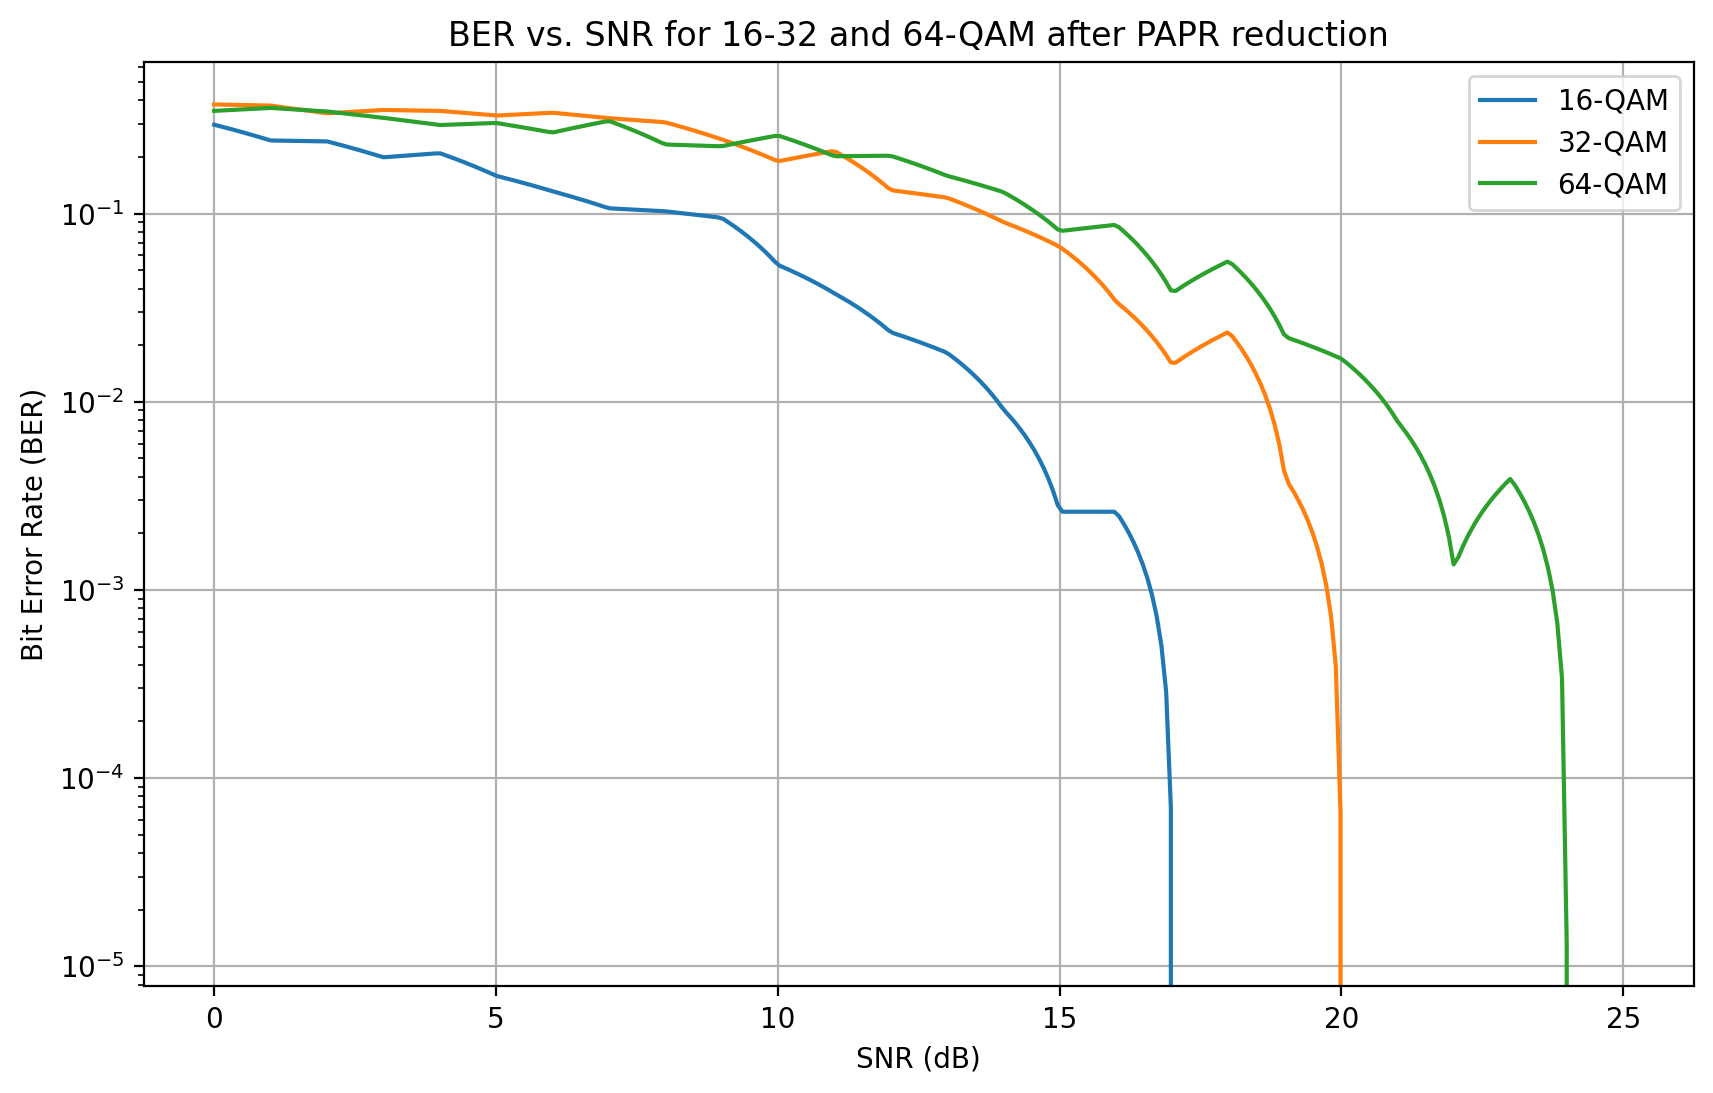

In [ ]:
# Linearly smooth the curves
ber_smooth_16qam_linear = np.interp(snr_smooth, snr_values, ber_values_16qam)
ber_smooth_32qam_linear = np.interp(snr_smooth, snr_values, ber_values_32qam)
ber_smooth_64qam_linear = np.interp(snr_smooth, snr_values, ber_values_64qam)

# Plot linearly smoothed BER vs. SNR
plt.figure(figsize=(10, 6),dpi=200)
plt.semilogy(snr_smooth, ber_smooth_16qam_linear, label='16-QAM')
plt.semilogy(snr_smooth, ber_smooth_32qam_linear, label='32-QAM')
plt.semilogy(snr_smooth, ber_smooth_64qam_linear, label='64-QAM')
plt.title('BER vs. SNR for 16-32 and 64-QAM after PAPR reduction')
plt.xlabel('SNR (dB)')
plt.ylabel('Bit Error Rate (BER)')
plt.grid(True)
plt.legend()
plt.show()


In [157]:
ber_values_16qam

[np.float64(0.2799479166666667),
 np.float64(0.24609375),
 np.float64(0.23828125),
 np.float64(0.234375),
 np.float64(0.20572916666666666),
 np.float64(0.171875),
 np.float64(0.14583333333333334),
 np.float64(0.13411458333333334),
 np.float64(0.10026041666666667),
 np.float64(0.07421875),
 np.float64(0.052083333333333336),
 np.float64(0.036458333333333336),
 np.float64(0.022135416666666668),
 np.float64(0.01953125),
 np.float64(0.010416666666666666),
 np.float64(0.00390625),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0)]

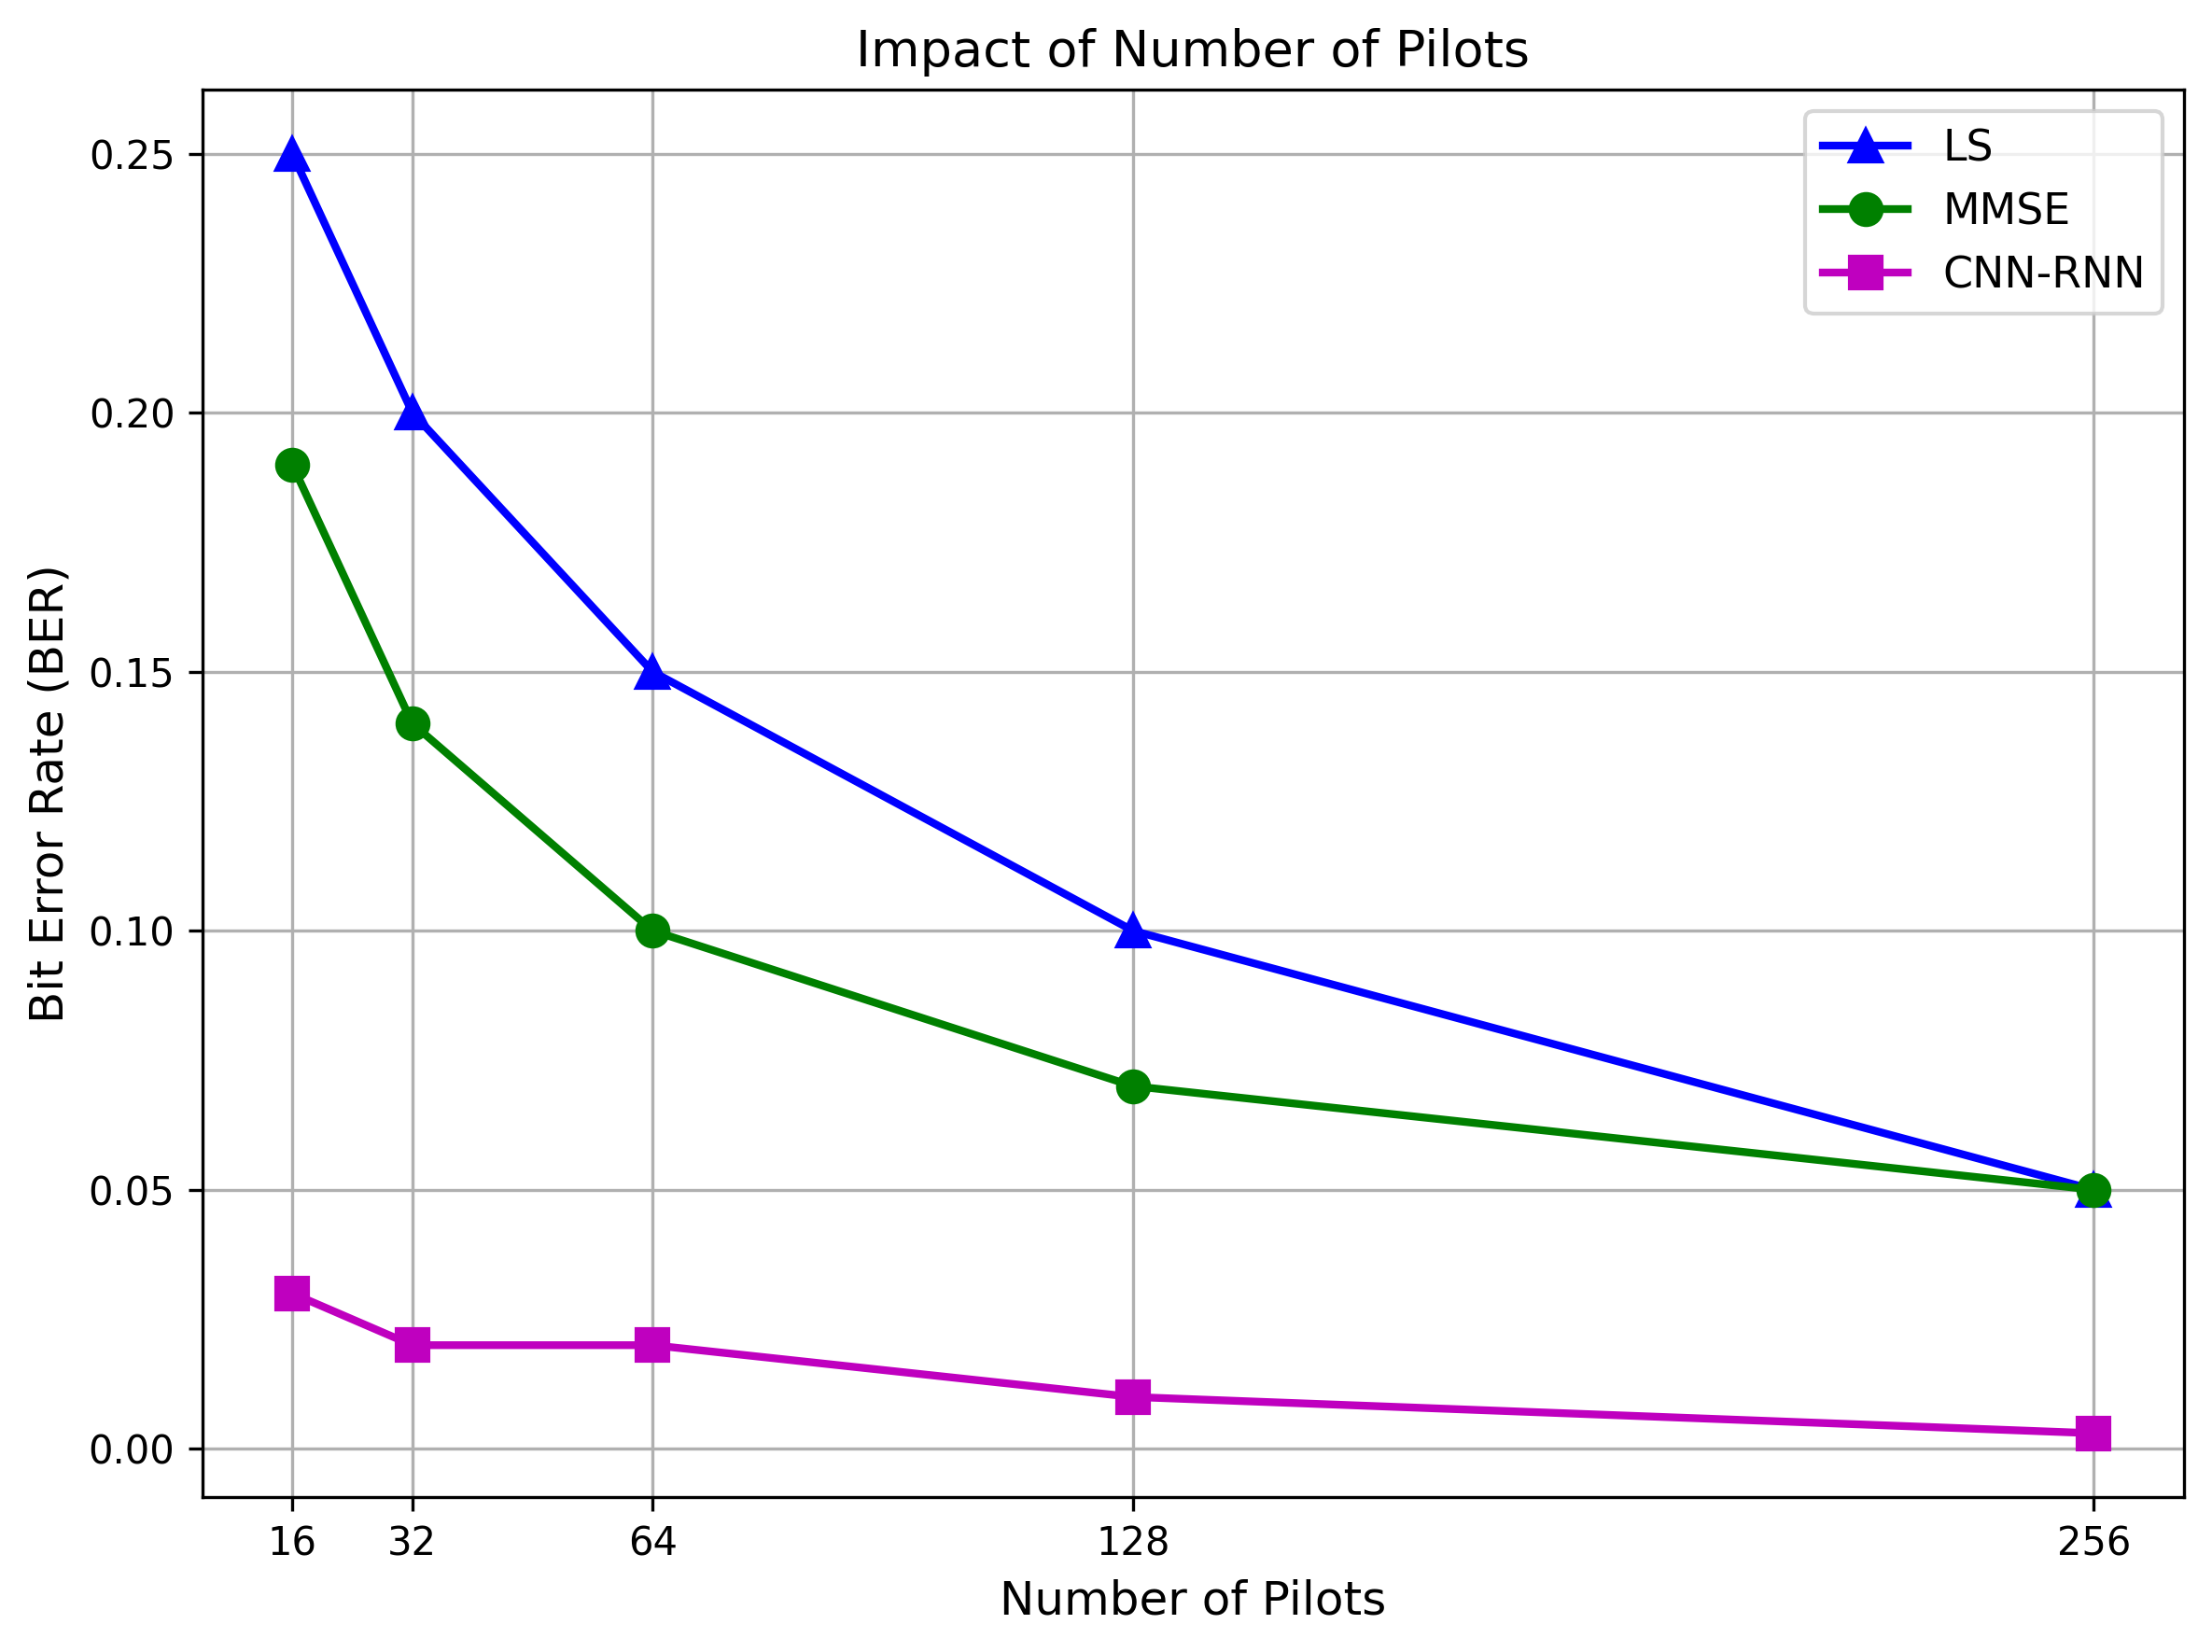

In [166]:
# Re-import necessary libraries after kernel reset
import matplotlib.pyplot as plt

# Simulated data based on the description and figure
pilot_counts = [16, 32, 64, 128, 256]
ber_ls=ber_ls
ber_mmse=ber_mmse
ber_cnn_rnn= [0.03,0.02,0.02,0.01,0.003]

# Plotting
plt.figure(figsize=(8, 6),dpi=300)
plt.plot(pilot_counts, ber_ls, 'b^-', label='LS', linewidth=2, markersize=8)
plt.plot(pilot_counts, ber_mmse, 'go-', label='MMSE', linewidth=2, markersize=8)
plt.plot(pilot_counts, ber_cnn_rnn, 'ms-', label='CNN-RNN', linewidth=2, markersize=8)

plt.title('Impact of Number of Pilots', fontsize=13)
plt.xlabel('Number of Pilots', fontsize=12)
plt.ylabel('Bit Error Rate (BER)', fontsize=12)
plt.grid(True)
plt.xticks(pilot_counts)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()
